In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
pd.set_option('display.max_columns', None)  
import pickle


In [2]:
pip install platypus-opt

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# BASE SCENARIO

In [31]:
# file='../no_interaction_28112023/Sc0_base_28112023.csv.csv'
# base = pd.read_csv(file)

In [30]:
# for col in base['police_start_pos']:
#     dictionary = eval(col)  # Safely evaluate the string as a dictionary
#     for key, value in dictionary.items():
#         new_col_name = f"police_start_pos{key}"
#         base[new_col_name] = value

#     # Drop the original 'police_start_pos' column
# base.drop(columns=['police_start_pos'], inplace=True)

# for col in base['police_goal']:
#     dictionary = eval(col)  # Safely evaluate the string as a dictionary
#     for key, value in dictionary.items():
#         new_col_name = f"police_goal{key}"
#         base[new_col_name] = value

#     # Drop the original 'police_start_pos' column
# base.drop(columns=['police_goal'], inplace=True)

# for col in base['police_changed_goal']:
#     dictionary = eval(col)  # Safely evaluate the string as a dictionary
#     for key, value in dictionary.items():
#         new_col_name = f"police_changed_goal{key}"
#         base[new_col_name] = value
# base.drop(columns=['police_changed_goal'], inplace=True)


#     #make the time cell an integer and subtract 2 hrs as those are warming up hours which do not count towards the escape
# def convert_time_to_minutes(time_str):
#     hours, minutes, seconds = map(int, time_str.split('.'))
#     total_minutes = hours * 60 + minutes
#     return total_minutes, seconds

# def subtract_hours_and_seconds(row, hours_to_subtract):
#     time_minutes, seconds = row['time_minutes'], row['seconds']
#     time_minutes -= hours_to_subtract * 60
#     return pd.Series({'time_minutes': time_minutes, 'seconds': seconds})

# # Apply the functions to the DataFrame
# base[['time_minutes', 'seconds']] = base['time'].apply(convert_time_to_minutes).apply(pd.Series)
# base[['time_minutes', 'seconds']] = base.apply(subtract_hours_and_seconds, args=(2,), axis=1)

# # Convert back to the desired format
# base['time'] = base.apply(lambda row: f"{int(row['time_minutes'])}.{row['seconds']}", axis=1)
# base['time']=base['time'].astype(float)

# #starting time varies, so this must be taken off the time
# base['time']=base['time']-((base['start_time']-240)/2)

# # Drop intermediate columns
# base = base.drop(columns=['time_minutes', 'seconds'])


In [29]:
# base.head(3)

In [28]:
# base.to_csv('../no_interaction_28112023/base_inoutput_28112023.csv', index=False)

In [3]:
base_file='../no_interaction_28112023/base_inoutput_28112023.csv' #check if this is correct file
base_inout = pd.read_csv(base_file)

In [4]:
print('capture', base_inout.capture.mean(),'\ntime',base_inout.time.mean())

capture 0.37735849056603776 
time 18.44811320754717


# IMPORT DATA

In [15]:
# scenarios = []

# for i in range(0, 648):
#     df = pd.read_csv(f"../no_interaction_28112023/Sc{i}_28112023.csv")
#     scenarios.append(df)

In [16]:
# #separate the multiple police instances from one cell to multiple cells
# for df in scenarios:
#     for col in df['police_start_pos']:
#         dictionary = eval(col)  # Safely evaluate the string as a dictionary
#         for key, value in dictionary.items():
#             new_col_name = f"police_start_pos{key}"
#             df[new_col_name] = value

#         # Drop the original 'police_start_pos' column
#     df.drop(columns=['police_start_pos'], inplace=True)

#     for col in df['police_goal']:
#         dictionary = eval(col)  # Safely evaluate the string as a dictionary
#         for key, value in dictionary.items():
#             new_col_name = f"police_goal{key}"
#             df[new_col_name] = value

#         # Drop the original 'police_start_pos' column
#     df.drop(columns=['police_goal'], inplace=True)

#     for col in df['police_changed_goal']:
#         dictionary = eval(col)  # Safely evaluate the string as a dictionary
#         for key, value in dictionary.items():
#             new_col_name = f"police_changed_goal{key}"
#             df[new_col_name] = value
#     df.drop(columns=['police_changed_goal'], inplace=True)
    
    
#         #make the time cell an integer and subtract 2 hrs as those are warming up hours which do not count towards the escape
#     def convert_time_to_minutes(time_str):
#         hours, minutes, seconds = map(int, time_str.split('.'))
#         total_minutes = hours * 60 + minutes
#         return total_minutes, seconds

#     def subtract_hours_and_seconds(row, hours_to_subtract):
#         time_minutes, seconds = row['time_minutes'], row['seconds']
#         time_minutes -= hours_to_subtract * 60
#         return pd.Series({'time_minutes': time_minutes, 'seconds': seconds})

#     # Apply the functions to the DataFrame
#     df[['time_minutes', 'seconds']] = df['time'].apply(convert_time_to_minutes).apply(pd.Series)
#     df[['time_minutes', 'seconds']] = df.apply(subtract_hours_and_seconds, args=(2,), axis=1)

#     # Convert back to the desired format
#     df['time'] = df.apply(lambda row: f"{int(row['time_minutes'])}.{row['seconds']}", axis=1)
#     df['time']=df['time'].astype(float)
    
#     #starting time varies, so this must be taken off the time
#     df['time']=df['time']-((df['start_time']-240)/2)

#     # Drop intermediate columns
#     df = df.drop(columns=['time_minutes', 'seconds'])

    

In [17]:
# # #rearrange columnts in so that the same police instances is in order 

# for df in scenarios: 
#     columns_with_numbers = [col for col in df.columns if col[-3:].isdigit()]

#     # Sort the columns with numbers based on the numeric part of the column name
#     sorted_columns_with_numbers = sorted(columns_with_numbers, key=lambda col: int(col[-3:]))

#     # Create the final reordered columns list
#     reordered_columns = [col for col in df.columns if col not in columns_with_numbers] + sorted_columns_with_numbers
    
#     df=df[reordered_columns]


#     # # Display the reordered columns list
#     # print(reordered_columns)

# ADD SCENARIOS

In [18]:
# file="../../data/experiment_scenarios_28112023.csv" #check if this is correct file
# input_var = pd.read_csv(file)

In [19]:
# input_var


In [20]:
# for idx, scenario_df in enumerate(scenarios):
#     # Extract input variables for the current scenario
#     input_row = input_var.iloc[idx]

#     # Add input variables as new columns to the scenario DataFrame
#     for col_name, col_value in input_row.items():
#         scenario_df[col_name] = col_value

# COMBINE ITERATIONS (SCENARIOS)

In [21]:

# # Assuming 'scenarios' is your list of DataFrames
# # Concatenate all the DataFrames in the list
# combined_inout = pd.concat(scenarios, ignore_index=True)

# # Initialize an empty list to store scenario numbers
# scenario_numbers = []

# # Iterate through the list to assign scenario numbers
# for i, df in enumerate(scenarios):
#     scenario_numbers.extend([i] * len(df))

# # Assign scenario numbers to the 'scenario' column in the combined DataFrame
# combined_inout['scenario'] = scenario_numbers

# #

In [22]:
# combined_inout

In [23]:
# # reorder columns
# cols = combined_inout.columns.tolist()

# # Move 'scenario' to the beginning of the list
# cols = ['scenario'] + [col for col in cols if col != 'scenario']

# # Reorder the columns in the DataFrame
# combined_inout = combined_inout[cols]



In [24]:
# combined_inout.head(195)

In [25]:
# combined_inout.to_csv('../no_interaction_28112023/no_int_inoutput_28112023.csv', index=False)

In [7]:
file='../no_interaction_28112023/no_int_inoutput_28112023.csv' #check if this is correct file
combined_inout = pd.read_csv(file)

In [8]:
print('capture', combined_inout.capture.mean(),'\ntime',combined_inout.time.mean())

capture 0.23012170385395536 
time 33.061764705882354


In [9]:
x=0

for item in combined_inout['game_over']:
    if item == False: 
        x=x+1
print(x)

0


# Uncertainty 95%%= cnffidence interval 

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Assuming df is your DataFrame
# Replace 'init_call_delay' and 'capture' with your actual column names
Sguard_column = 'crim_Sguard_percent'
capture_column = 'capture'

# Filter out rows with missing values in the specified columns
filtered_df = combined_inout[[Sguard_column, capture_column]].dropna()

# Group data by unique values in 'init_call_delay'
grouped_data = filtered_df.groupby(Sguard_column)[capture_column].apply(list)

# Calculate mean and standard deviation for each group
means = grouped_data.apply(np.mean)
std_devs = grouped_data.apply(np.std)

# Set the confidence level (e.g., 95% confidence interval)
confidence_level = 0.95

# Calculate the confidence interval for each group
conf_intervals = stats.norm.interval(confidence_level, loc=means, scale=std_devs / np.sqrt(grouped_data.apply(len)))

# Create a new DataFrame to store the results
result_df = pd.DataFrame({
    'Sguard_column': means.index,
    'mean_capture': means.values,
    'lower_bound': conf_intervals[0],
    'upper_bound': conf_intervals[1]
})

# Display or use the result_df as needed
result_df


Sguard_column  mean_capture  lower_bound  upper_bound
0             50      0.213221     0.207929     0.218513
1             70      0.231040     0.225594     0.236486
2             90      0.246109     0.240543     0.251676

# ENCODE

In [6]:
combined_inout.columns

Index(['scenario', 'start_time', 'time', 'capture', 'escape', 'game_over',
       'criminal_goal', 'game_over_pos', 'criminal_passed_police',
       'police_gone_undercover', 'criminal_diverged_from_path',
       'criminal_tried_exits', 'criminal_seen_police', 'crim_Sguard_percent',
       'crim_Mguard_percent', 'init_call_delay', 'info_update_freq',
       'criminal_detection_police', 'police_start_pos100',
       'police_start_pos101', 'police_start_pos102', 'police_goal100',
       'police_goal101', 'police_goal102', 'police_changed_goal100',
       'police_changed_goal101', 'police_changed_goal102', 'time_minutes',
       'seconds', 'crim_pos', 'crim_strat', 'crim_bounded_rat',
       'crim_max_diverge', 'pol_strat', 'pol_guarding', 'Police_entrance',
       'units', 'P_multiple_at_station', 'police_start_pos103',
       'police_start_pos104', 'police_goal103', 'police_goal104',
       'police_changed_goal103', 'police_changed_goal104',
       'police_start_pos105', 'police_start_p

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

encoded_inout = combined_inout.copy()

# Selecting only the string columns for label encoding
string_columns = ['crim_pos', 'crim_bounded_rat',
       'crim_strat', 'pol_strat',
       'pol_guarding', 'Police_entrance']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

encoded_meanings = {}

# Label encoding for each column
for col in string_columns:
    encoded_values = label_encoder.fit_transform(encoded_inout[col])
    encoded_inout[col] = encoded_values  # Update the column with encoded values
    original_values = label_encoder.inverse_transform(encoded_values)
    encoded_meanings[col] = {encoded: original for encoded, original in zip(encoded_values, original_values)}

    
df_encoded_meanings = pd.DataFrame(encoded_meanings)
# df_encoded_meanings
# encoded_inout


NameError: name 'combined_inout' is not defined

In [38]:
#check encoded values
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Assuming 'combined_inout' is your DataFrame

# encoded_inout = combined_inout.copy()

# # Selecting only the string columns for label encoding
# string_columns = encoded_inout.select_dtypes(include='object')

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# encoded_meanings = {}

# # Label encoding for each column
# for col in string_columns:
#     encoded_values = label_encoder.fit_transform(encoded_inout[col])
#     encoded_inout[col] = encoded_values  # Update the column with encoded values
#     original_values = label_encoder.inverse_transform(encoded_values)
#     encoded_meanings[col] = {encoded: original for encoded, original in zip(encoded_values, original_values)}

# # Create a DataFrame to show the original values for each encoded value
# df_encoded_meanings = pd.DataFrame()
# encoded_meanings

In [8]:
print(encoded_meanings['crim_strat'])
print(encoded_meanings['pol_strat'])

{1: 'random', 2: 'to_train', 0: 'furthest'}
{0: 'furthest', 1: 'largest', 2: 'surround'}


In [9]:
# encoded_inout

# FEATURE IMPORTANCE

In [10]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# import pandas as pd
# print(pd.__version__)

In [ ]:
# pip install --user pandas==1.3.3

In [ ]:
# import pytest
# import pandas as pd

# with pytest.warns(FutureWarning):
#     from pandas import Int64Index

In [39]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [10]:
# pip install Numpy==1.23.5

In [11]:
# import numpy as np
# print(np.__version__)

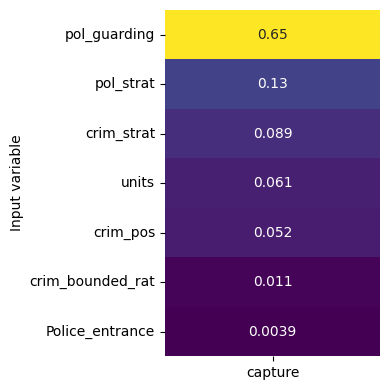

In [40]:
# feature importance all
from ema_workbench.analysis import feature_scoring

x = encoded_inout[['crim_pos', 'crim_strat', 'crim_bounded_rat',\
                    'pol_strat', 'pol_guarding',\
                  'Police_entrance',\
                  'units']]
y = {'capture': encoded_inout['capture'].values}

fs = feature_scoring.get_feature_scores_all(x, y)
highest_score_column = fs.columns[0]  # Assuming the scores are in the second column, adjust as needed
fs_sorted = fs.sort_values(by=highest_score_column, ascending=False)


plt.figure(figsize=(4, 4))
# Visualize the sorted feature importance scores
heatmap = sns.heatmap(fs_sorted, cmap="viridis", annot=True)
# Remove the colorbar legend on the side
heatmap.collections[0].colorbar.remove()


# Remove y-axis labels
heatmap.set_ylabel('Input variable')
# Adjust layout to prevent clipping of axis labels
plt.tight_layout()
plt.savefig('Figures/noint_featureimp_capture.png')
plt.show()


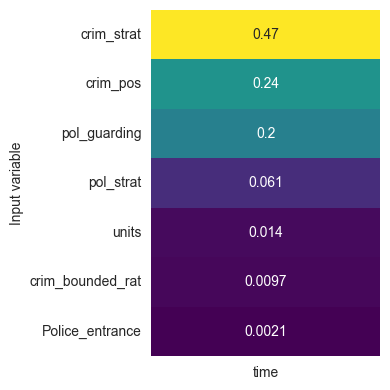

In [47]:
# feature importance all
from ema_workbench.analysis import feature_scoring
import matplotlib.pyplot as plt
import seaborn as sns

x = encoded_inout[['crim_pos', 'crim_strat', 'crim_bounded_rat', 'pol_strat', 'pol_guarding', 'Police_entrance', 'units',]]
y = {'time': encoded_inout['time'].values}

fs = feature_scoring.get_feature_scores_all(x, y)
highest_score_column = fs.columns[0]  # Assuming the scores are in the second column, adjust as needed
fs_sorted = fs.sort_values(by=highest_score_column, ascending=False)

plt.figure(figsize=(4, 4))

# Visualize the sorted feature importance scores
heatmap = sns.heatmap(fs_sorted, cmap="viridis", annot=True)
# Remove the colorbar legend on the side
heatmap.collections[0].colorbar.remove()
# Remove y-axis labels
heatmap.set_ylabel('Input variable')
# Adjust layout to prevent clipping of axis labels
plt.tight_layout()
plt.savefig('Figures/noint_featureimp_time.png')
plt.show()

In [44]:
test=encoded_inout.iloc[[10,12,20]]

In [45]:
test

scenario  start_time  time  capture  escape  game_over    criminal_goal  \
10         0         244  25.0    False    True       True       Poortugaal   
12         0         252   2.5     True   False       True       Romeynshof   
20         0         240  21.5    False    True       True  Capelle Centrum   

      game_over_pos  criminal_passed_police  police_gone_undercover  \
10       Poortugaal                       0                   False   
12            Beurs                       2                   False   
20  Capelle Centrum                       0                   False   

    criminal_diverged_from_path  criminal_tried_exits  criminal_seen_police  \
10                            0                     0                     0   
12                            0                     0                     0   
20                            0                     0                     0   

    crim_Sguard_percent  crim_Mguard_percent  init_call_delay  \
10                   50                   50                6   
12                   70                   50                1   
20                   70                   50                6   

    info_update_freq  criminal_detection_police   police_start_pos100  \
10               100                         50  Politie Marconiplein   
12               100                         50  Politie Marconiplein   
20               100                         50  Politie Marconiplein   

               police_start_pos101             police_start_pos102  \
10  Politie Krimpen aan den Ijssel  Politie Krimpen aan den Ijssel   
12  Politie Krimpen aan den Ijssel  Politie Krimpen aan den Ijssel   
20  Politie Krimpen aan den Ijssel  Politie Krimpen aan den Ijssel   

      police_goal100 police_goal101 police_goal102  police_changed_goal100  \
10  Schiedam Centrum     Nesselande     Nesselande                       0   
12  Schiedam Centrum     Nesselande     Nesselande                       0   
20  Schiedam Centrum     Nesselande     Nesselande                       0   

    police_changed_goal101  police_changed_goal102  time_minutes  seconds  \
10                       0                       0            27        0   
12                       0                       0             8        5   
20                       0                       0            21        5   

    crim_pos  crim_strat  crim_bounded_rat  crim_max_diverge  pol_strat  \
10         0           1                 1                10          0   
12         0           1                 1                10          0   
20         0           1                 1                10          0   

    pol_guarding  Police_entrance  units  P_multiple_at_station  \
10             0                0      3                      5   
12             0                0      3                      5   
20             0                0      3                      5   

   police_start_pos103 police_start_pos104 police_goal103 police_goal104  \
10                 NaN                 NaN            NaN            NaN   
12                 NaN                 NaN            NaN            NaN   
20                 NaN                 NaN            NaN            NaN   

    police_changed_goal103  police_changed_goal104 police_start_pos105  \
10                     NaN                     NaN                 NaN   
12                     NaN                     NaN                 NaN   
20                     NaN                     NaN                 NaN   

   police_start_pos106 police_start_pos107 police_start_pos108  \
10                 NaN                 NaN                 NaN   
12                 NaN                 NaN                 NaN   
20                 NaN                 NaN                 NaN   

   police_start_pos109 police_goal105 police_goal106 police_goal107  \
10                 NaN            NaN            NaN            NaN   
12                 NaN            NaN            

In [14]:
#another way of calculating the featur eimportance 

# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt

# # Assuming x and y are already defined
# model = RandomForestClassifier()
# x = encoded_inout[['crim_pos', 'crim_strat', 'crim_bounded_rat',\
#                    'crim_max_diverge', 'pol_strat', 'pol_guarding',\
#                   'Police_entrance',\
#                   'units', 'P_multiple_at_station']]
# y =  encoded_inout['capture'].values

# model.fit(x, y)

# feature_importances = model.feature_importances_

# # Plotting the feature importances
# # plt.bar(x.columns, feature_importances)
# # plt.xlabel('Features')
# # plt.ylabel('Importance')
# # plt.show()

# importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# # Sort the DataFrame by importance
# importance_df = importance_df.sort_values(by='Importance', ascending=False)
# importance_df

# MORDM

In [16]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [51]:
police = encoded_inout.groupby(['pol_strat', 'pol_guarding', 'Police_entrance', 'units']).mean()[['capture','time']]

# If you want to reset the index and have a DataFrame as a result
police = police.reset_index()

police.rename(columns={'capture': 'capture mean'}, inplace=True)
police.rename(columns={'time': 'time mean'}, inplace=True)

# Display the resulting DataFrame
police

pol_strat  pol_guarding  Police_entrance  units  capture mean  time mean
0           0             0                0      3      0.210636  33.691867
1           0             0                0      5      0.277952  33.194619
2           0             0                0     10      0.359188  32.332119
3           0             0                1      3      0.209459  33.364865
4           0             0                1      5      0.263651  32.993760
5           0             0                1     10      0.352941  32.738938
6           0             1                0      3      0.029796  40.046524
7           0             1                0      5      0.045073  39.627096
8           0             1                0     10      0.079790  39.561680
9           0             1                1      3      0.023499  40.108094
10          0             1                1      5      0.038662  39.157785
11          0             1                1     10      0.089623  39.650943
12          1             0                0      3      0.350130  29.384416
13          1             0                0      5      0.569430  23.950518
14          1             0                0     10      0.709694  20.685848
15          1             0                1      3      0.319315  30.025441
16          1             0                1      5      0.574468  24.045148
17          1             0                1     10      0.699637  20.632574
18          1             1                0      3      0.006273  39.861213
19          1             1                0      5      0.001056  39.513992
20          1             1                0     10      0.009424  39.966492
21          1             1                1      3      0.004186  39.635269
22          1             1                1      5      0.005774  39.466929
23          1             1                1     10      0.014637  39.963931
24          2             0                0      3      0.449223  23.436010
25          2             0                0      5      0.499741  21.272916
26          2             0                0     10      0.549070  19.913481
27          2             0                1      3      0.460861  22.895283
28          2             0                1      5      0.498180  21.503380
29          2             0                1     10      0.529657  20.153746
30          2             1                0      3      0.001047  39.646335
31          2             1                0      5      0.001570  39.893250
32          2             1                0     10      0.006835  40.216614
33          2             1                1      3      0.000000  39.400993
34          2             1                1      5      0.000000  39.785639
35          2             1                1     10      0.006296  39.735834

C:\Users\cvanh\AppData\Local\Temp/ipykernel_21964/4102987242.py:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


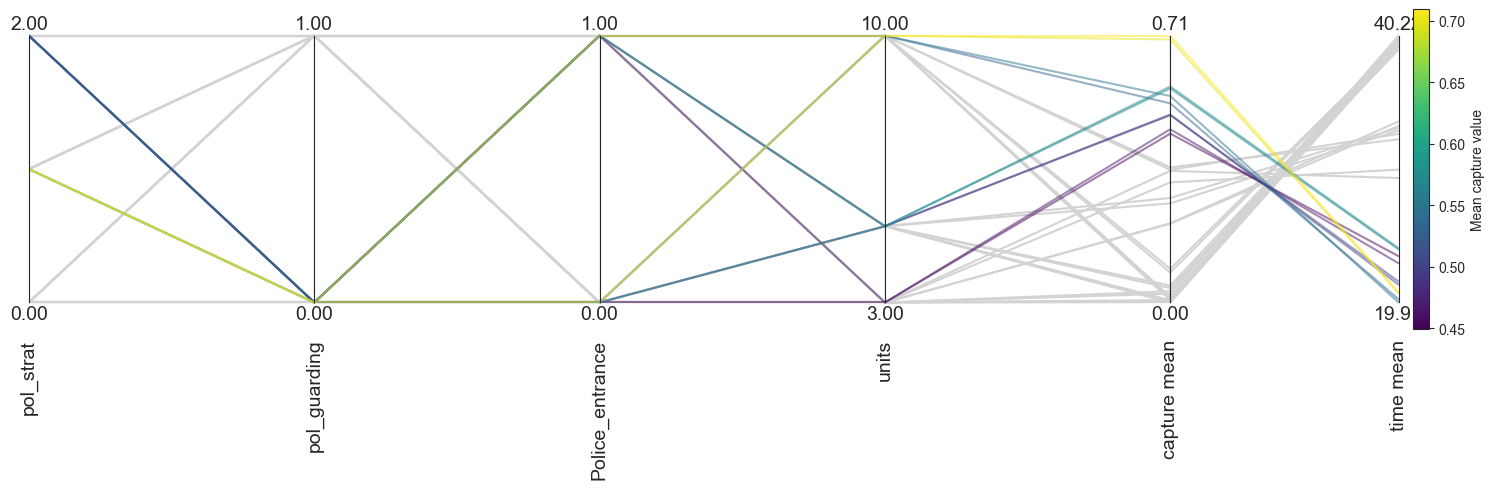

In [52]:
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import numpy as np

# Assuming 'police' is your DataFrame
# Assuming base_inout is your DataFrame containing 'capture' column

threshold = base_inout['capture'].mean()

plt.rcParams['figure.figsize'] = (15, 5)

limits = parcoords.get_limits(police)
axes = parcoords.ParallelAxes(limits)

# Get the number of instances for each row and normalize it
num_instances = police.apply(lambda row: row['capture mean'], axis=1)

# Filter instances where 'capture' is greater than the threshold
num_instances_gt_threshold = num_instances[num_instances > threshold]

# Update normalization to consider only instances with 'capture' > threshold
norm = Normalize(vmin=num_instances_gt_threshold.min(), vmax=num_instances_gt_threshold.max())

# # Use the viridis palette from Seaborn
cmap = sns.color_palette("viridis", as_cmap=True)
# cmap = LinearSegmentedColormap.from_list('custom_cmap', ['yellow', 'navy'])


# Create a scalar mappable
sm = ScalarMappable(cmap=cmap, norm=norm)

# Plot grey lines for instances where 'capture' < threshold
for index, row in police.iterrows():
    if row['capture mean'] < threshold:
        axes.plot(row, color='lightgrey')

# Plot colored lines for instances where 'capture' > threshold
# Plot colored lines for instances where 'capture' > threshold
for index, row in police.sort_values(by='capture mean', ascending=True).iterrows():
    if row['capture mean'] >= threshold:
        color = sm.to_rgba(row['capture mean'])
        # Add alpha parameter for transparency
        axes.plot(row, color=color, alpha=0.5)  

# Add colorbar for the gradient part
cbar = plt.colorbar(sm)
cbar.set_label('Mean capture value')

# we invert this axis so direction of desirability is the same 
# axes.invert_axis('summed_deaths') 
# plt.savefig('./figs/parcoord.png', dpi=600)
plt.savefig('Figures/noint_parallel_pol.png')
plt.show()

In [55]:
print('pol_strat', encoded_meanings['pol_strat'])
print('pol_guarding',encoded_meanings['pol_guarding'])
print('Police_entrance', encoded_meanings['Police_entrance'])



pol_strat {0: 'furthest', 1: 'largest', 2: 'surround'}
pol_guarding {0: 'metro_platform', 1: 'station_exit'}
Police_entrance {0: 'main', 1: 'side'}


In [17]:
criminal = encoded_inout.groupby(['crim_pos', 'crim_strat', 'crim_bounded_rat',]).mean()[['capture','time']]

# If you want to reset the index and have a DataFrame as a result
criminal = criminal.reset_index()

criminal.rename(columns={'capture': 'capture mean'}, inplace=True)
criminal.rename(columns={'time': 'time mean'}, inplace=True)

# Display the resulting DataFrame
criminal

crim_pos  crim_strat  crim_bounded_rat  capture mean  time mean
0          0           0                 0      0.273148  33.549769
1          0           0                 1      0.307567  41.048685
2          0           1                 0      0.173560  20.697644
3          0           1                 1      0.201685  25.966994
4          0           2                 0      0.140175   9.126543
5          0           2                 1      0.134002  13.719907
6          1           0                 0      0.319444  56.310957
7          1           0                 1      0.367216  57.491122
8          1           1                 0      0.212449  36.926055
9          1           1                 1      0.225739  37.044110
10         1           2                 0      0.220165  31.597865
11         1           2                 1      0.225309  31.490612
12         2           0                 0      0.267747  47.474023
13         2           0                 1      0.319441  48.382764
14         2           1                 0      0.191429  30.438052
15         2           1                 1      0.214665  31.901036
16         2           2                 0      0.174897  21.108925
17         2           2                 1      0.177212  21.085520

In [18]:
base_inout['capture'].mean()

0.37735849056603776

C:\Users\cvanh\AppData\Local\Temp/ipykernel_13696/3065553305.py:47: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


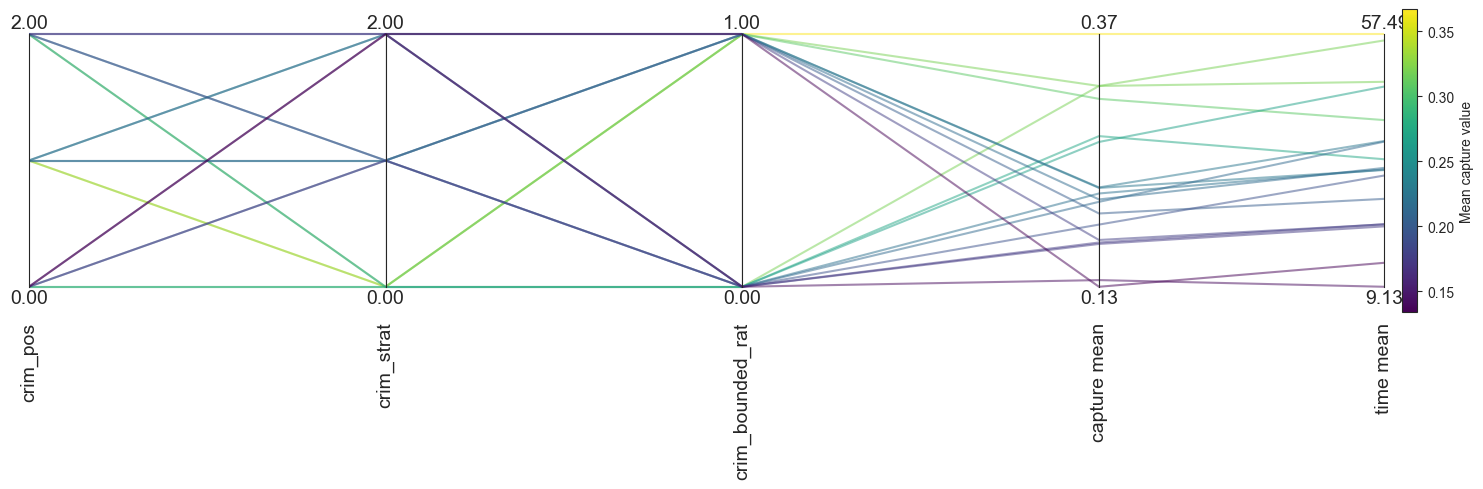

In [19]:
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import numpy as np

# Assuming 'police' is your DataFrame
# Assuming base_inout is your DataFrame containing 'capture' column

threshold = base_inout['capture'].mean()

plt.rcParams['figure.figsize'] = (15, 5)

limits = parcoords.get_limits(criminal)
axes = parcoords.ParallelAxes(limits)

# Get the number of instances for each row and normalize it
num_instances = criminal.apply(lambda row: row['capture mean'], axis=1)

# Filter instances where 'capture' is smaller than the threshold
num_instances_gt_threshold = num_instances[num_instances < threshold]

# Update normalization to consider only instances with 'capture' > threshold
norm = Normalize(vmin=num_instances_gt_threshold.min(), vmax=num_instances_gt_threshold.max())

# # Use the viridis palette from Seaborn
cmap = sns.color_palette("viridis", as_cmap=True)
# cmap = LinearSegmentedColormap.from_list('custom_cmap', ['yellow', 'navy'])


# Create a scalar mappable
sm = ScalarMappable(cmap=cmap, norm=norm)

# Plot grey lines for instances where 'capture' < threshold
for index, row in criminal.iterrows():
    if row['capture mean'] > threshold:
        axes.plot(row, color='lightgrey')

# Plot colored lines for instances where 'capture' < threshold
for index, row in criminal.sort_values(by='capture mean', ascending=False).iterrows():
    if row['capture mean'] <= threshold:
        color = sm.to_rgba(row['capture mean'])
        # Add alpha parameter for transparency
        axes.plot(row, color=color, alpha=0.5)  

# Add colorbar for the gradient part
cbar = plt.colorbar(sm)
cbar.set_label('Mean capture value')

# we invert this axis so direction of desirability is the same 
# axes.invert_axis('summed_deaths') 
# plt.savefig('./figs/parcoord.png', dpi=600)
plt.savefig('Figures/noint_parallel_crim.png')
plt.show()

In [19]:
print('crim_pos', encoded_meanings['crim_pos'])
print('crim_strat',encoded_meanings['crim_strat'])



crim_pos {0: 'centre', 1: 'end', 2: 'one_line'}
crim_strat {1: 'random', 2: 'to_train', 0: 'furthest'}


In [31]:
grouped_data

In [37]:
combined_inout['init_call_delay'].unique()

array([1, 3, 6], dtype=int64)

In [21]:

# # Group the DataFrame based on columns pol_strat, pol_guarding, Police_entrance, units, and init_call_delay
# grouped_data = combined_inout.groupby(['pol_strat', 'pol_guarding', 'Police_entrance', 'units', 'init_call_delay'])

# # Create a figure and axes
# fig, ax = plt.subplots(figsize=(15, 10))

# legend_entries = []

# # Create a dictionary to store colors for each init_call_delay value
# colors_dict = {1: 'gold', 3: 'lightseagreen', 6: 'darkslateblue'}

# # Iterate over the groups
# for (value_pol_strat, value_pol_guarding, value_Police_entrance, value_units, value_delay), group_df in grouped_data:
#     group_df = group_df.sort_values(by='time')
#     group_df['cumulative_captures'] = group_df['capture'].cumsum()

#     legend_entries.append((
#         f'Group-{value_pol_strat}{value_pol_guarding}{value_Police_entrance}{value_units}{value_delay}',
#         group_df['cumulative_captures'].max()
#     ))

#     color = colors_dict.get(value_delay, 'gray')  # Default to gray if the value_delay is not in the dictionary

#     sns.lineplot(
#         x='time',
#         y='cumulative_captures',
#         data=group_df,
#         label=f'Group-{value_pol_strat}{value_pol_guarding}{value_Police_entrance}{value_units}{value_delay}',
#         color=color  # Assign color based on init_call_delay
#     )

# legend_entries.sort(key=lambda x: x[1], reverse=True)

# # Create a custom legend
# custom_legend = [plt.Line2D([0], [0], color=colors_dict[val], lw=2, label=f'Init Call Delay: {val}') for val in colors_dict.keys()]
# ax.legend(handles=custom_legend, loc='upper right')

# plt.xticks(range(0, 120, 30))
# plt.ylim(0, 600)
# plt.xlim(0, 120)

# ax.set(frame_on=False)

# plt.savefig('Figures/noint_timevscap_pol.png')

# plt.show()

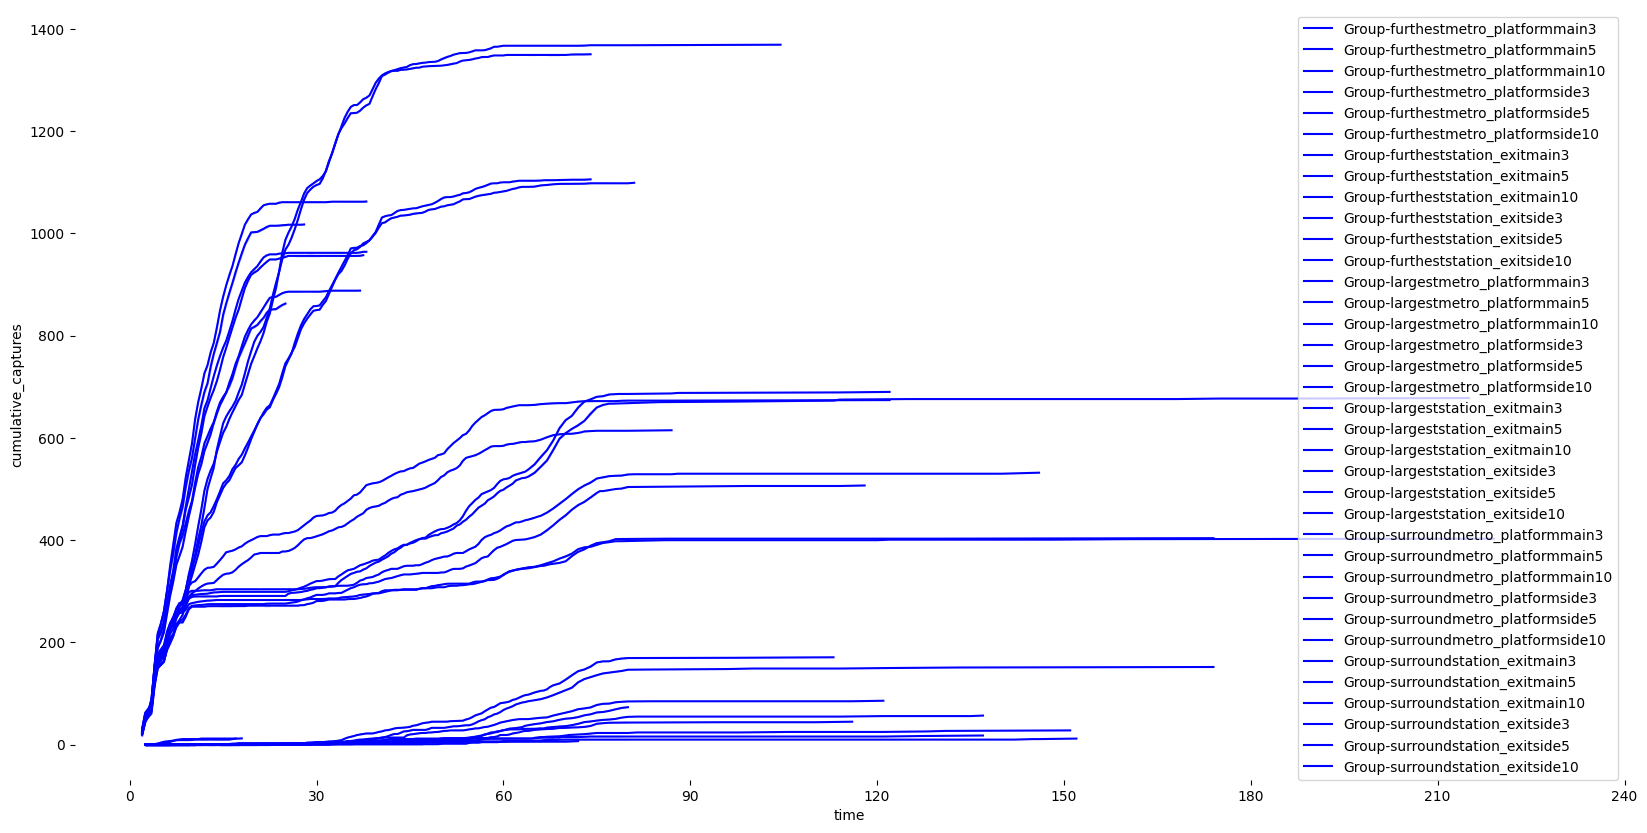

In [15]:

# Group the DataFrame based on columns pol_strat, pol_guarding, Police_entrance, units, and init_call_delay
grouped_data = combined_inout.groupby(['pol_strat', 'pol_guarding', 'Police_entrance', 'units'])

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

legend_entries = []

# Create a dictionary to store colors for each init_call_delay value
colors_dict = {1: 'gold', 3: 'lightseagreen', 6: 'darkslateblue'}

# Iterate over the groups
for (value_pol_strat, value_pol_guarding, value_Police_entrance, value_units), group_df in grouped_data:
    group_df = group_df.sort_values(by='time')
    group_df['cumulative_captures'] = group_df['capture'].cumsum()

    # Find the index where cumulative captures reach 90% of the max value
    threshold_index = np.where(group_df['cumulative_captures'] >= 0.99999 * group_df['cumulative_captures'].max())[0]
    if len(threshold_index) > 0:
        threshold_index = threshold_index[0]
        group_df = group_df.iloc[:threshold_index + 1]  # Keep data up to the threshold index

    legend_entries.append((
        f'Group-{value_pol_strat}{value_pol_guarding}{value_Police_entrance}{value_units}',
        group_df['cumulative_captures'].max()
    ))

    # color = colors_dict.get(value_delay, 'gray')
    color='blue'

    sns.lineplot(
        x='time',
        y='cumulative_captures',
        data=group_df,
        label=f'Group-{value_pol_strat}{value_pol_guarding}{value_Police_entrance}{value_units}',
        color=color
    )

legend_entries.sort(key=lambda x: x[1], reverse=True)
# mean_caps=combined_inout.groupby(['init_call_delay'])['capture'].mean().round(2)

# Create a custom legend
# custom_legend = [plt.Line2D([0], [0], color=colors_dict[val], lw=2, label=f'Init Call Delay: {val} min') for val in colors_dict.keys()]
# ax.legend(handles=custom_legend, loc='upper right')

plt.xticks(range(0, 270, 30))
# plt.ylim(0, 500)
# plt.xlim(0, 120)

ax.set(frame_on=False)

plt.savefig('Figures/noint_timevscap_pol.png')

plt.show()

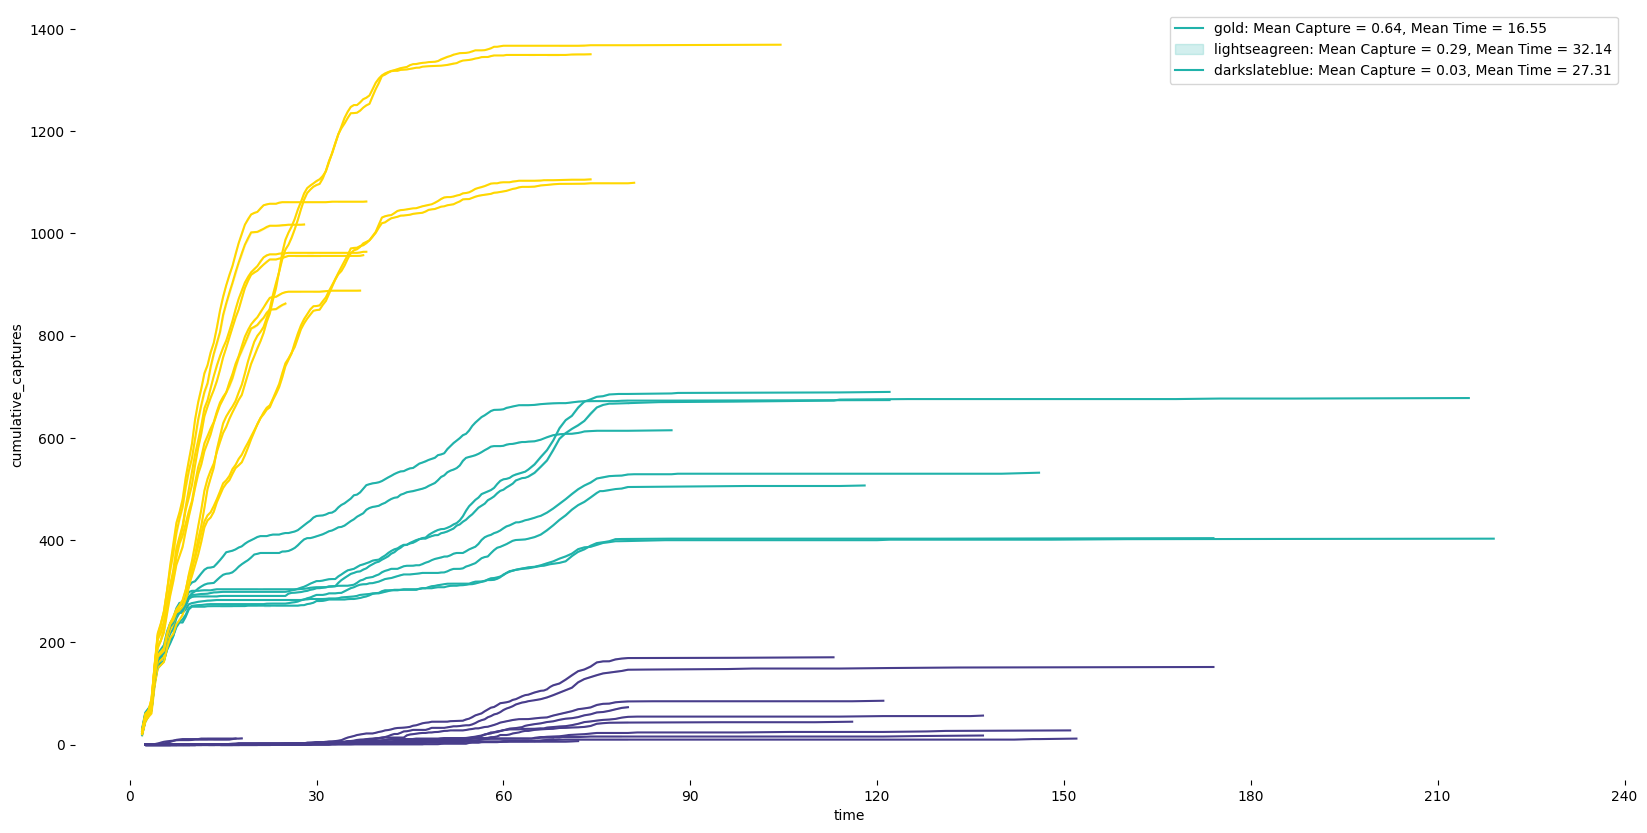

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group the DataFrame based on columns pol_strat, pol_guarding, Police_entrance, units, and init_call_delay
grouped_data = combined_inout.groupby(['pol_strat', 'pol_guarding', 'Police_entrance', 'units'])

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

legend_entries = []

# Create a dictionary to store colors for different cumulative capture ranges
color_ranges = {'darkslateblue': (0, 300), 'lightseagreen': (301, 800), 'gold': (801, 1500)}

# Create lists to store mean capture values and mean times for each color
mean_captures = {'darkslateblue': [], 'lightseagreen': [], 'gold': []}
mean_times = {'darkslateblue': [], 'lightseagreen': [], 'gold': []}

# Iterate over the groups
for (value_pol_strat, value_pol_guarding, value_Police_entrance, value_units), group_df in grouped_data:
    group_df = group_df.sort_values(by='time')
    group_df['cumulative_captures'] = group_df['capture'].cumsum()

    # Find the index where cumulative captures reach 90% of the max value
    threshold_index = np.where(group_df['cumulative_captures'] >= 0.99999 * group_df['cumulative_captures'].max())[0]
    if len(threshold_index) > 0:
        threshold_index = threshold_index[0]
        group_df = group_df.iloc[:threshold_index + 1]  # Keep data up to the threshold index

    # Assign color based on cumulative capture values
    for color, (lower_bound, upper_bound) in color_ranges.items():
        if lower_bound <= group_df['cumulative_captures'].max() <= upper_bound:
            sns.lineplot(
                x='time',
                y='cumulative_captures',
                data=group_df,
                label=f'Group-{value_pol_strat}{value_pol_guarding}{value_Police_entrance}{value_units}',
                color=color
            )
            # Append mean capture and mean time values to the respective lists
            mean_captures[color].append(group_df['capture'].mean())
            mean_times[color].append(group_df['time'].mean())
            break

# Create a custom legend with mean capture and mean time values
custom_legend_labels = []
for color in ['gold', 'lightseagreen', 'darkslateblue']:
    mean_capture_value = round(np.mean(mean_captures[color]), 2)
    mean_time_value = round(np.mean(mean_times[color]), 2)
    custom_legend_labels.append(f'{color}: Mean Capture = {mean_capture_value}, Mean Time = {mean_time_value}')

# Set legend
ax.legend(custom_legend_labels, loc='upper right')

plt.xticks(range(0, 270, 30))

ax.set(frame_on=False)

plt.savefig('Figures/noint_timevscap_pol.png')

plt.show()

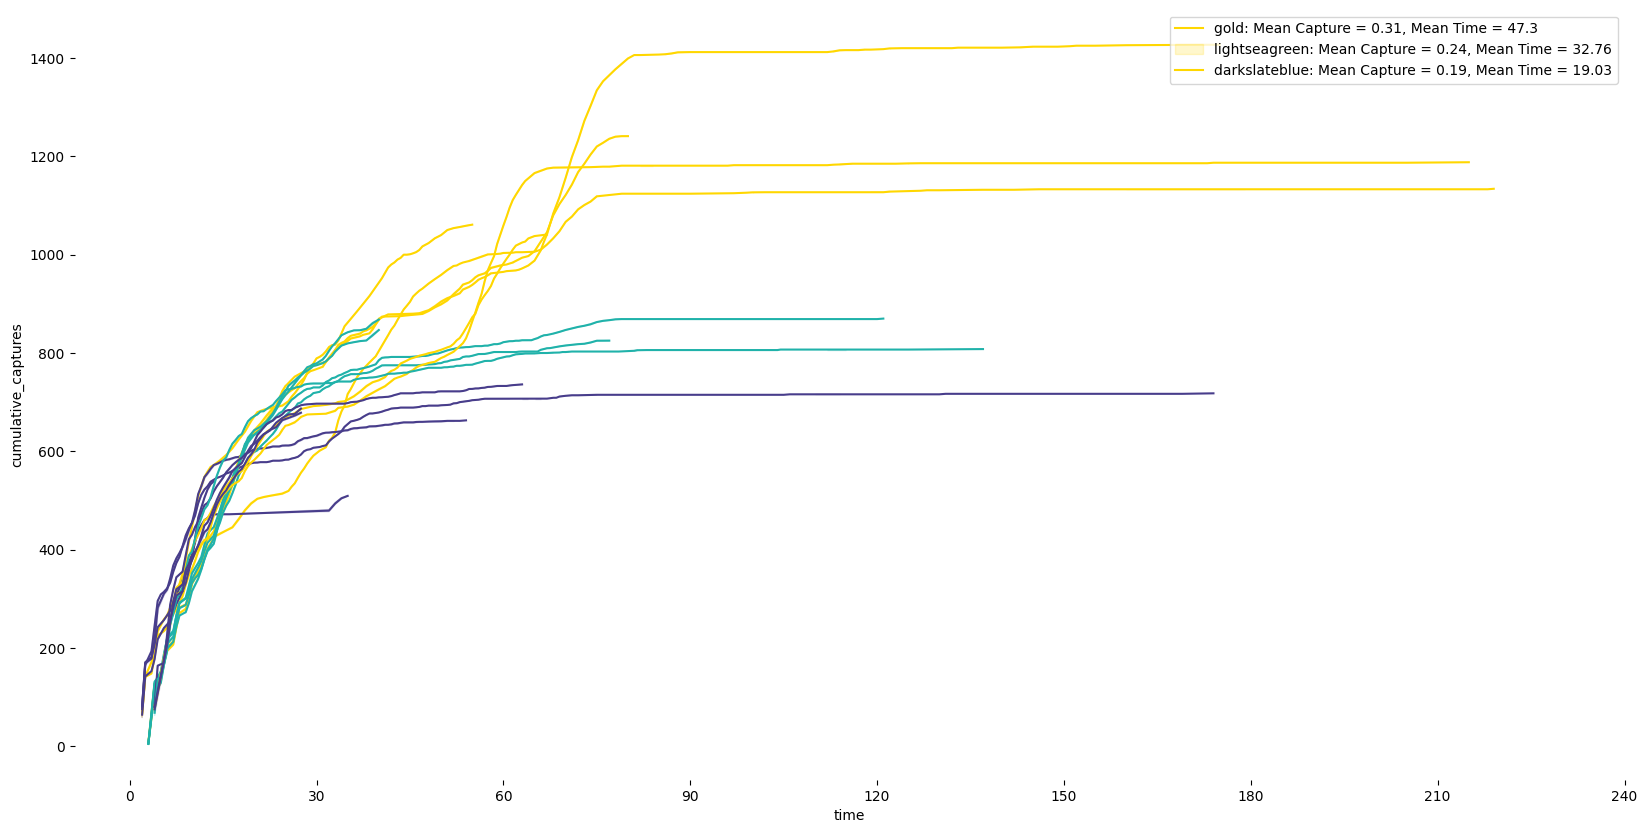

In [36]:

# Group the DataFrame based on columns pol_strat, pol_guarding, Police_entrance, units, and init_call_delay
grouped_data = combined_inout.groupby(['crim_pos', 'crim_strat', 'crim_bounded_rat'])
# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

legend_entries = []

# Create a dictionary to store colors for different cumulative capture ranges
color_ranges = {'darkslateblue': (0, 750), 'lightseagreen': (751, 900), 'gold': (901, 1500)}

# Create lists to store mean capture values and mean times for each color
mean_captures = {'darkslateblue': [], 'lightseagreen': [], 'gold': []}
mean_times = {'darkslateblue': [], 'lightseagreen': [], 'gold': []}

# Iterate over the groups
for (value_crim_pos, value_crim_strat, value_crim_bound_rat), group_df in grouped_data:
    group_df = group_df.sort_values(by='time')
    group_df['cumulative_captures'] = group_df['capture'].cumsum()

    # Find the index where cumulative captures reach 90% of the max value
    threshold_index = np.where(group_df['cumulative_captures'] >= 0.99999 * group_df['cumulative_captures'].max())[0]
    if len(threshold_index) > 0:
        threshold_index = threshold_index[0]
        group_df = group_df.iloc[:threshold_index + 1]  # Keep data up to the threshold index

    # Assign color based on cumulative capture values
    for color, (lower_bound, upper_bound) in color_ranges.items():
        if lower_bound <= group_df['cumulative_captures'].max() <= upper_bound:
            sns.lineplot(
                x='time',
                y='cumulative_captures',
                data=group_df,
                label=f'Group-{value_crim_pos}{value_crim_strat}{value_crim_bound_rat}',
                color=color
            )
            # Append mean capture and mean time values to the respective lists
            mean_captures[color].append(group_df['capture'].mean())
            mean_times[color].append(group_df['time'].mean())
            break

# Create a custom legend with mean capture and mean time values
custom_legend_labels = []
for color in ['gold', 'lightseagreen', 'darkslateblue']:
    mean_capture_value = round(np.mean(mean_captures[color]), 2)
    mean_time_value = round(np.mean(mean_times[color]), 2)
    custom_legend_labels.append(f'{color}: Mean Capture = {mean_capture_value}, Mean Time = {mean_time_value}')

# Set legend
ax.legend(custom_legend_labels, loc='upper right')

plt.xticks(range(0, 270, 30))

ax.set(frame_on=False)

plt.savefig('Figures/noint_timevscap_crim.png')

plt.show()

plt.show()

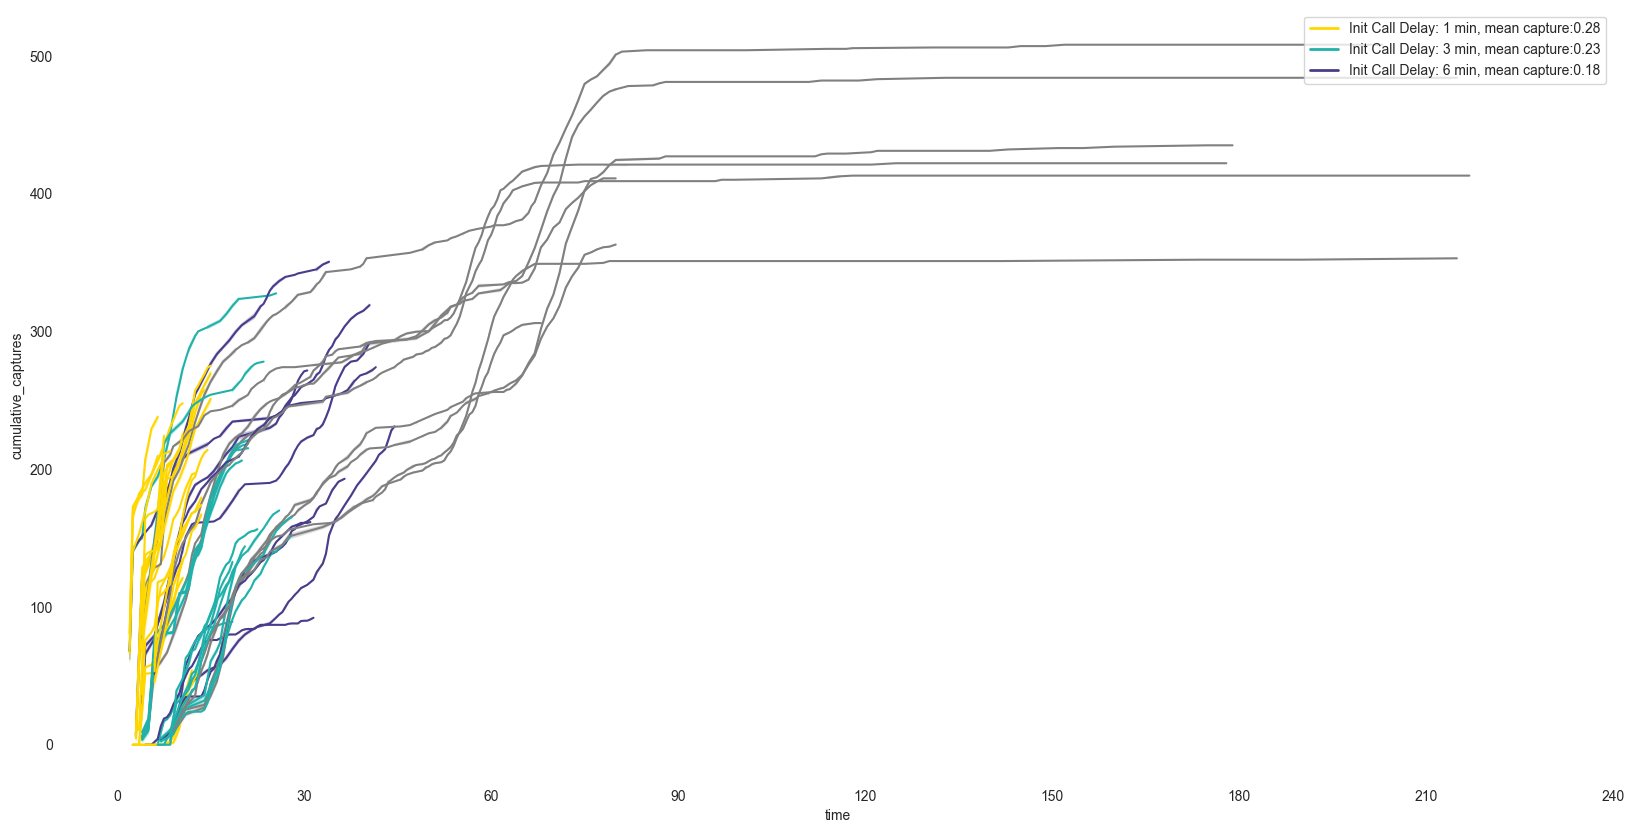

In [79]:

# Group the DataFrame based on columns pol_strat, pol_guarding, Police_entrance, units, and init_call_delay
grouped_data = combined_inout.groupby(['crim_pos', 'crim_strat', 'crim_bounded_rat','init_call_delay'])

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))
legend_entries = []

# Create a dictionary to store colors for each group
colors_dict = {}

# Time intervals for thresholds
time_interval_15min = 15
time_interval_30min = 30
time_interval_45min = 45


# Create a dictionary to store colors for each init_call_delay value
colors_dict = {1: 'gold', 3: 'lightseagreen', 6: 'darkslateblue'}

# Iterate over the groups
for (value_crim_pos, value_crim_strat, value_crim_bound_rat,value_delay), group_df in grouped_data:
    group_df = group_df.sort_values(by='time')
    group_df['cumulative_captures'] = group_df['capture'].cumsum()

    # Find the index where cumulative captures reach 75% of the max value within specified time intervals
    threshold_index_15min = np.where((group_df['cumulative_captures'] >= 0.75 * group_df['cumulative_captures'].max()) & (group_df['time'] <= time_interval_15min))[0]
    threshold_index_30min = np.where((group_df['cumulative_captures'] >= 0.75 * group_df['cumulative_captures'].max()) & (group_df['time'] <= time_interval_30min))[0]
    threshold_index_45min = np.where((group_df['cumulative_captures'] >= 0.75 * group_df['cumulative_captures'].max()) & (group_df['time'] <= time_interval_45min))[0]

    if len(threshold_index_15min) > 0:
        threshold_index_15min = threshold_index_15min[0]
        group_df = group_df.iloc[:threshold_index_15min + 1]  # Keep data up to the threshold index
        color = 'gold'
    elif len(threshold_index_30min) > 0:
        threshold_index_30min = threshold_index_30min[0]
        group_df = group_df.iloc[:threshold_index_30min + 1]  # Keep data up to the threshold index
        color = 'lightseagreen'
    elif len(threshold_index_45min) > 0:
        threshold_index_45min = threshold_index_45min[0]
        group_df = group_df.iloc[:threshold_index_45min + 1]  # Keep data up to the threshold index
        color = 'darkslateblue'
    else:
        color = 'gray'

    legend_entries.append((
        f'Group-{value_crim_pos}{value_crim_strat}{value_crim_bound_rat}{value_delay}',
        group_df['cumulative_captures'].max()
    ))

    sns.lineplot(
        x='time',
        y='cumulative_captures',
        data=group_df,
        label=f'Group-{value_crim_pos}{value_crim_strat}{value_crim_bound_rat}{value_delay}',
        color=color
    )

legend_entries.sort(key=lambda x: x[1], reverse=True)

# # Create a custom legend
# custom_legend = [plt.Line2D([0], [0], color=color, lw=2, label=f'Threshold: {val} min') for val, color in {'15': 'green', '30': 'orange', '45': 'red'}.items()]
# ax.legend(handles=custom_legend, loc='upper right')

mean_caps=combined_inout.groupby(['init_call_delay'])['capture'].mean().round(2)
custom_legend = [plt.Line2D([0], [0], color=colors_dict[val], lw=2, label=f'Init Call Delay: {val} min, mean capture:{mean_caps[val]}') for val in colors_dict.keys()]
ax.legend(handles=custom_legend, loc='upper right')

plt.xticks(range(0, 270, 30))
# plt.ylim(0, 500)
# plt.xlim(0, 120)

ax.set(frame_on=False)

plt.savefig('Figures/noint_timevscap_crim.png')

plt.show()

# SENSITIVITY ANALYSIS

In [ ]:
columns_of_interest = ['crim_pos', 'crim_strat', 'crim_bounded_rat',
                        'pol_strat', 'pol_guarding',
                        'Police_entrance', 'units', ]

# columns_of_interest = ['pol_guarding']

# Group by the specified columns
grouped_df = combined_inout.groupby(columns_of_interest)

# Calculate the mean and standard deviation for the 'capture' variable within each group
result_df = grouped_df[['capture','time']].agg(['mean', 'std']).reset_index()

# Display the result
result_df

crim_pos crim_strat crim_bounded_rat pol_strat    pol_guarding  \
                                                                      
0      centre   furthest            False  furthest  metro_platform   
1      centre   furthest            False  furthest  metro_platform   
2      centre   furthest            False  furthest  metro_platform   
3      centre   furthest            False  furthest  metro_platform   
4      centre   furthest            False  furthest  metro_platform   
..        ...        ...              ...       ...             ...   
643  one_line   to_train             True  surround    station_exit   
644  one_line   to_train             True  surround    station_exit   
645  one_line   to_train             True  surround    station_exit   
646  one_line   to_train             True  surround    station_exit   
647  one_line   to_train             True  surround    station_exit   

    Police_entrance units   capture                 time             
                               mean       std       mean        std  
0              main     3  0.370370  0.485155  33.675926  14.835597  
1              main     5  0.472222  0.501555  33.226852  15.149471  
2              main    10  0.703704  0.458752  34.601852  14.058915  
3              side     3  0.268519  0.445255  35.050926  14.820884  
4              side     5  0.546296  0.500173  33.504630  15.338166  
..              ...   ...       ...       ...        ...        ...  
643            main     5  0.000000  0.000000  24.055556   3.366502  
644            main    10  0.000000  0.000000  23.731481   3.086317  
645            side     3  0.000000  0.000000  24.111111   3.614181  
646            side     5  0.000000  0.000000  24.277778   2.986992  
647            side    10  0.000000  0.000000  24.222222   3.439282  

[648 rows x 11 columns]

In [85]:
columns_of_interest = ['crim_pos', 'crim_strat', 'crim_bounded_rat',
                        'pol_strat', 'pol_guarding',
                        'Police_entrance', 'units']


# columns_of_interest = ['pol_guarding']

# Group by the specified columns
grouped_df = combined_inout.groupby(columns_of_interest)

# Calculate the mean and standard deviation for the 'capture' variable within each group
result_df = grouped_df[['capture','time']].agg(['mean', 'std', 'var']).reset_index()

# Display the result
result_df.sort_values(by=('time', 'std'),ascending=False)

crim_pos crim_strat crim_bounded_rat pol_strat    pol_guarding  \
                                                                      
496  one_line   furthest             True  surround  metro_platform   
495  one_line   furthest             True  surround  metro_platform   
276       end   furthest             True  surround  metro_platform   
473  one_line   furthest             True  furthest  metro_platform   
36     centre   furthest             True  furthest  metro_platform   
..        ...        ...              ...       ...             ...   
594  one_line   to_train            False   largest    station_exit   
587  one_line   to_train            False  furthest    station_exit   
646  one_line   to_train             True  surround    station_exit   
371       end   to_train            False  furthest    station_exit   
608  one_line   to_train            False  surround    station_exit   

    Police_entrance units   capture                           time             \
                               mean       std       var       mean        std   
496            side     5  0.401961  0.492715  0.242768  38.803922  32.958732   
495            side     3  0.355140  0.480808  0.231176  39.200935  30.835371   
276            main     3  0.601852  0.491798  0.241866  32.439815  30.288004   
473            side    10  0.679612  0.468908  0.219874  50.970874  29.504970   
36             main     3  0.330097  0.472547  0.223301  45.548544  29.284734   
..              ...   ...       ...       ...       ...        ...        ...   
594            main     3  0.000000  0.000000  0.000000  24.046296   3.002753   
587            side    10  0.000000  0.000000  0.000000  24.138889   2.990509   
646            side     5  0.000000  0.000000  0.000000  24.277778   2.986992   
371            side    10  0.000000  0.000000  0.000000  37.486111   2.972977   
608            main    10  0.000000  0.000000  0.000000  24.064815   2.910738   

                  
             var  
496  1086.278004  
495   950.820093  
276   917.363166  
473   870.543261  
36    857.595660  
..           ...  
594     9.016528  
587     8.943146  
646     8.922118  
371     8.838590  
608     8.472395  

[648 rows x 13 columns]

In [21]:
columns_of_interest = ['crim_pos', 'crim_strat', 'crim_bounded_rat']


# columns_of_interest = ['pol_guarding']

# Group by the specified columns
grouped_df = combined_inout.groupby(columns_of_interest)

# Calculate the mean and standard deviation for the 'capture' variable within each group
result_df = grouped_df[['capture','time']].agg(['mean', 'std', 'var']).reset_index()

# Display the result
result_df.sort_values(by=('time', 'std'),ascending=False)

crim_pos crim_strat crim_bounded_rat   capture                      \
                                              mean       std       var   
7        end   furthest             True  0.367216  0.482108  0.232428   
6        end   furthest            False  0.319444  0.466321  0.217456   
13  one_line   furthest             True  0.319441  0.466323  0.217457   
1     centre   furthest             True  0.307567  0.461549  0.213027   
9        end     random             True  0.225739  0.418123  0.174827   
3     centre     random             True  0.201685  0.401315  0.161054   
8        end     random            False  0.212449  0.409093  0.167357   
15  one_line     random             True  0.214665  0.410644  0.168629   
12  one_line   furthest            False  0.267747  0.442842  0.196109   
14  one_line     random            False  0.191429  0.393477  0.154824   
0     centre   furthest            False  0.273148  0.445634  0.198589   
5     centre   to_train             True  0.134002  0.340698  0.116075   
10       end   to_train            False  0.220165  0.414411  0.171736   
11       end   to_train             True  0.225309  0.417839  0.174590   
2     centre     random            False  0.173560  0.378780  0.143475   
17  one_line   to_train             True  0.177212  0.381897  0.145845   
16  one_line   to_train            False  0.174897  0.379928  0.144345   
4     centre   to_train            False  0.140175  0.347213  0.120557   

         time                         
         mean        std         var  
7   57.491122  26.608008  707.986086  
6   56.310957  24.662792  608.253294  
13  48.382764  22.665386  513.719711  
1   41.048685  22.471309  504.959715  
9   37.044110  21.138676  446.843629  
3   25.966994  20.993455  440.725168  
8   36.926055  20.658194  426.760996  
15  31.901036  19.853000  394.141612  
12  47.474023  19.657669  386.423946  
14  30.438052  16.761105  280.934652  
0   33.549769  13.894463  193.056115  
5   13.719907  12.489115  155.977998  
10  31.597865  11.260435  126.797405  
11  31.490612  11.251194  126.589377  
2   20.697644  11.047504  122.047337  
17  21.085520   6.987361   48.823209  
16  21.108925   6.939522   48.156964  
4    9.126543   5.225854   27.309555

In [49]:
columns_of_interest = ['pol_strat', 'pol_guarding',
                        'Police_entrance', 'units']


# columns_of_interest = ['pol_guarding']

# Group by the specified columns
grouped_df = combined_inout.groupby(columns_of_interest)

# Calculate the mean and standard deviation for the 'capture' variable within each group
result_df = grouped_df[['capture','time']].agg(['mean', 'std', 'var']).reset_index()

# Display the result
result_df.sort_values(by=('time', 'std'),ascending=False)

pol_strat    pol_guarding Police_entrance units   capture            \
                                                        mean       std   
1   furthest  metro_platform            main     5  0.277952  0.448107   
0   furthest  metro_platform            main     3  0.210636  0.407867   
3   furthest  metro_platform            side     3  0.209459  0.407029   
5   furthest  metro_platform            side    10  0.352941  0.478009   
4   furthest  metro_platform            side     5  0.263651  0.440727   
2   furthest  metro_platform            main    10  0.359188  0.479887   
18   largest    station_exit            main     3  0.006273  0.078973   
6   furthest    station_exit            main     3  0.029796  0.170069   
31  surround    station_exit            main     5  0.001570  0.039601   
15   largest  metro_platform            side     3  0.319315  0.466332   
23   largest    station_exit            side    10  0.014637  0.120125   
30  surround    station_exit            main     3  0.001047  0.032351   
34  surround    station_exit            side     5  0.000000  0.000000   
32  surround    station_exit            main    10  0.006835  0.082412   
12   largest  metro_platform            main     3  0.350130  0.477134   
21   largest    station_exit            side     3  0.004186  0.064583   
8   furthest    station_exit            main    10  0.079790  0.271039   
35  surround    station_exit            side    10  0.006296  0.079117   
27  surround  metro_platform            side     3  0.460861  0.498595   
11  furthest    station_exit            side    10  0.089623  0.285715   
20   largest    station_exit            main    10  0.009424  0.096645   
19   largest    station_exit            main     5  0.001056  0.032487   
24  surround  metro_platform            main     3  0.449223  0.497544   
22   largest    station_exit            side     5  0.005774  0.075789   
7   furthest    station_exit            main     5  0.045073  0.207519   
10  furthest    station_exit            side     5  0.038662  0.192840   
33  surround    station_exit            side     3  0.000000  0.000000   
9   furthest    station_exit            side     3  0.023499  0.151521   
28  surround  metro_platform            side     5  0.498180  0.500127   
29  surround  metro_platform            side    10  0.529657  0.499250   
25  surround  metro_platform            main     5  0.499741  0.500129   
26  surround  metro_platform            main    10  0.549070  0.497715   
16   largest  metro_platform            side     5  0.574468  0.494552   
13   largest  metro_platform            main     5  0.569430  0.495284   
17   largest  metro_platform            side    10  0.699637  0.458534   
14   largest  metro_platform            main    10  0.709694  0.454021   

                   time                         
         var       mean        std         var  
1   0.200800  33.194619  23.778290  565.407086  
0   0.166355  33.691867  23.521036  553.239120  
3   0.165672  33.364865  23.504891  552.479909  
5   0.228493  32.738938  23.183056  537.454077  
4   0.194240  32.993760  22.730287  516.665934  
2   0.230292  32.332119  22.595326  510.548754  
18  0.006237  39.861213  22.055208  486.432219  
6   0.028923  40.046524  21.505787  462.498880  
31  0.001568  39.893250  21.331628  455.038337  
15  0.217466  30.025441  21.264088  452.161430  
23  0.014430  39.963931  21.205578  449.676523  
30  0.001047  39.646335  20.990686  440.608879  
34  0.000000  39.785639  20.987128  440.459531  
32  0.006792  40.216614  20.949185  438.868361  
12  0.227657  29.384416  20.854224  434.898666  
21  0.004171  39.635269  20.813825  433.215331  
8   0.073462  39.561680  20.776573  431.665968  
35  0.006260  39.735834  20.708294  428.833461  
27  0.248597  22.895283  20.506455  420.514703  
11  0.081633  39.650943  20.480061  419.432894  
20  0.009340  39.966492  20.468074  418.942041  
19  0.001055  39.513992  20.447333  418.093439  
24  0.247550  

In [20]:
def cov(a, b):

    if len(a) != len(b):
        return

    a_mean = np.mean(a)
    b_mean = np.mean(b)

    sum = 0

    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))

    return sum/(len(a)-1)

In [26]:
listy=['pol_strat', 'pol_guarding', 'Police_entrance', 'units']
for item in listy:
    grouped_df = combined_inout.groupby(item)[['capture', 'time']]

    # Calculate mean, std, and var for 'capture' and 'time' within each group
    result_df = grouped_df.agg({
        'capture': ['mean', 'std'],
        'time': ['mean', 'std']
    }).reset_index()
    # for x in combined_inout[item].unique(): 
    #     section = combined_inout[combined_inout['pol_strat'] == 'furthest']
    #     cap_cov=cov(section[item],section['capture'])
    #     time_cov=cov(section[item],section['capture'])
    #     result_row = result_df[result_df[item] == x]
    #     result_df['cov_capture'].iloc[result_row]=cap_cov
    #     result_df['cov_time'].iloc[result_row]=time_cov
        
#     for x in combined_inout[item].unique(): 
#         section = combined_inout[combined_inout[item] == x]
#         print(item)
#         cap_cov = np.cov(section[item], section['capture'])[0, 1]
#         time_cov = np.cov(section[item], section['time'])[0, 1]
#         print(cap_cov,time_cov)

#         result_df.loc[result_df[item] == x, 'cov_capture'] = cap_cov
#         result_df.loc[result_df[item] == x, 'cov_time'] = time_cov

    # Rename the columns for clarity
    result_df.columns = [item, 'mean_capture', 'std_capture','mean_time', 'std_time', ]
    # Round all values to two decimal places
    result_df = result_df.round(2)

    display(result_df)

pol_strat  mean_capture  std_capture  mean_time  std_time
0  furthest          0.17         0.37      36.36     22.18
1   largest          0.27         0.45      32.22     20.99
2  surround          0.25         0.43      30.61     22.25

pol_guarding  mean_capture  std_capture  mean_time  std_time
0  metro_platform          0.44         0.50      26.45     21.07
1    station_exit          0.02         0.14      39.74     20.77

Police_entrance  mean_capture  std_capture  mean_time  std_time
0            main          0.23         0.42      33.08     22.01
1            side          0.23         0.42      33.04     21.89

units  mean_capture  std_capture  mean_time  std_time
0      3          0.17         0.38      34.27     22.23
1      5          0.23         0.42      32.83     21.80
2     10          0.29         0.45      32.08     21.76

In [37]:
for item in listy:
    if item != 'units':
        print(encoded_meanings[item])
        print(item,'capture',np.cov(encoded_inout[item],encoded_inout['capture'])[0,1].round(2))
        print(item,'time',np.cov(encoded_inout[item],encoded_inout['time'])[0,1].round(2),'\n')
    else:
        print(item,'capture',np.cov(combined_inout[item],combined_inout['capture'])[0,1].round(2))
        print(item,'time',np.cov(combined_inout[item],combined_inout['time'])[0,1].round(2),'\n')

{0: 'furthest', 1: 'largest', 2: 'surround'}
pol_strat capture 0.03
pol_strat time -1.92 

{0: 'metro_platform', 1: 'station_exit'}
pol_guarding capture -0.1
pol_guarding time 3.32 

{0: 'main', 1: 'side'}
Police_entrance capture -0.0
Police_entrance time -0.01 

units capture 0.13
units time -2.43 



In [36]:
cov(encoded_inout['pol_guarding'],encoded_inout['capture'])

-0.10450718996836009

In [44]:
# Group by 'pol_strat'
listy=['crim_pos', 'crim_strat','crim_bounded_rat']
for item in listy:
    grouped_df = combined_inout.groupby(item)[['capture', 'time']]
        
    result_df = grouped_df.agg({
        'capture': ['mean', 'std'],
        'time': ['mean', 'std']
    }).reset_index()
    
    result_df.columns = [item, 'mean_capture', 'std_capture','mean_time', 'std_time', ]
    # Round all values to two decimal places
    result_df = result_df.round(2)
    display(result_df)

crim_pos  mean_capture  std_capture  mean_time  std_time
0    centre          0.20         0.40      23.85     18.89
1       end          0.26         0.44      41.82     22.94
2  one_line          0.22         0.42      33.30     19.98

crim_strat  mean_capture  std_capture  mean_time  std_time
0   furthest          0.31         0.46      47.42     23.56
1     random          0.20         0.40      30.57     19.62
2   to_train          0.18         0.38      21.35     12.58

crim_bounded_rat  mean_capture  std_capture  mean_time  std_time
0             False          0.22         0.41      31.94     20.69
1              True          0.24         0.43      34.21     23.11

In [39]:
for item in listy:
    if item != 'units':
        print(encoded_meanings[item])
        print(item,'capture',np.cov(encoded_inout[item],encoded_inout['capture'])[0,1].round(2))
        print(item,'time',np.cov(encoded_inout[item],encoded_inout['time'])[0,1].round(2),'\n')
    else:
        print(item,'capture',np.cov(combined_inout[item],combined_inout['capture'])[0,1].round(2))
        print(item,'time',np.cov(combined_inout[item],combined_inout['time'])[0,1].round(2),'\n')

{0: 'centre', 1: 'end', 2: 'one_line'}
crim_pos capture 0.01
crim_pos time 3.11 

{1: 'random', 2: 'to_train', 0: 'furthest'}
crim_strat capture -0.04
crim_strat time -8.73 

{1: True, 0: False}
crim_bounded_rat capture 0.01
crim_bounded_rat time 0.57 



# PAY OFF MATRIX

In [105]:
combined_inout.columns

Index(['scenario', 'start_time', 'time', 'capture', 'escape', 'game_over',
       'criminal_goal', 'game_over_pos', 'criminal_passed_police',
       'police_gone_undercover', 'criminal_diverged_from_path',
       'criminal_tried_exits', 'criminal_seen_police', 'crim_Sguard_percent',
       'crim_Mguard_percent', 'init_call_delay', 'info_update_freq',
       'criminal_detection_police', 'police_start_pos100',
       'police_start_pos101', 'police_start_pos102', 'police_goal100',
       'police_goal101', 'police_goal102', 'police_changed_goal100',
       'police_changed_goal101', 'police_changed_goal102', 'time_minutes',
       'seconds', 'crim_pos', 'crim_strat', 'crim_bounded_rat',
       'crim_max_diverge', 'pol_strat', 'pol_guarding', 'Police_entrance',
       'units', 'P_multiple_at_station', 'police_start_pos103',
       'police_start_pos104', 'police_goal103', 'police_goal104',
       'police_changed_goal103', 'police_changed_goal104',
       'police_start_pos105', 'police_start_p

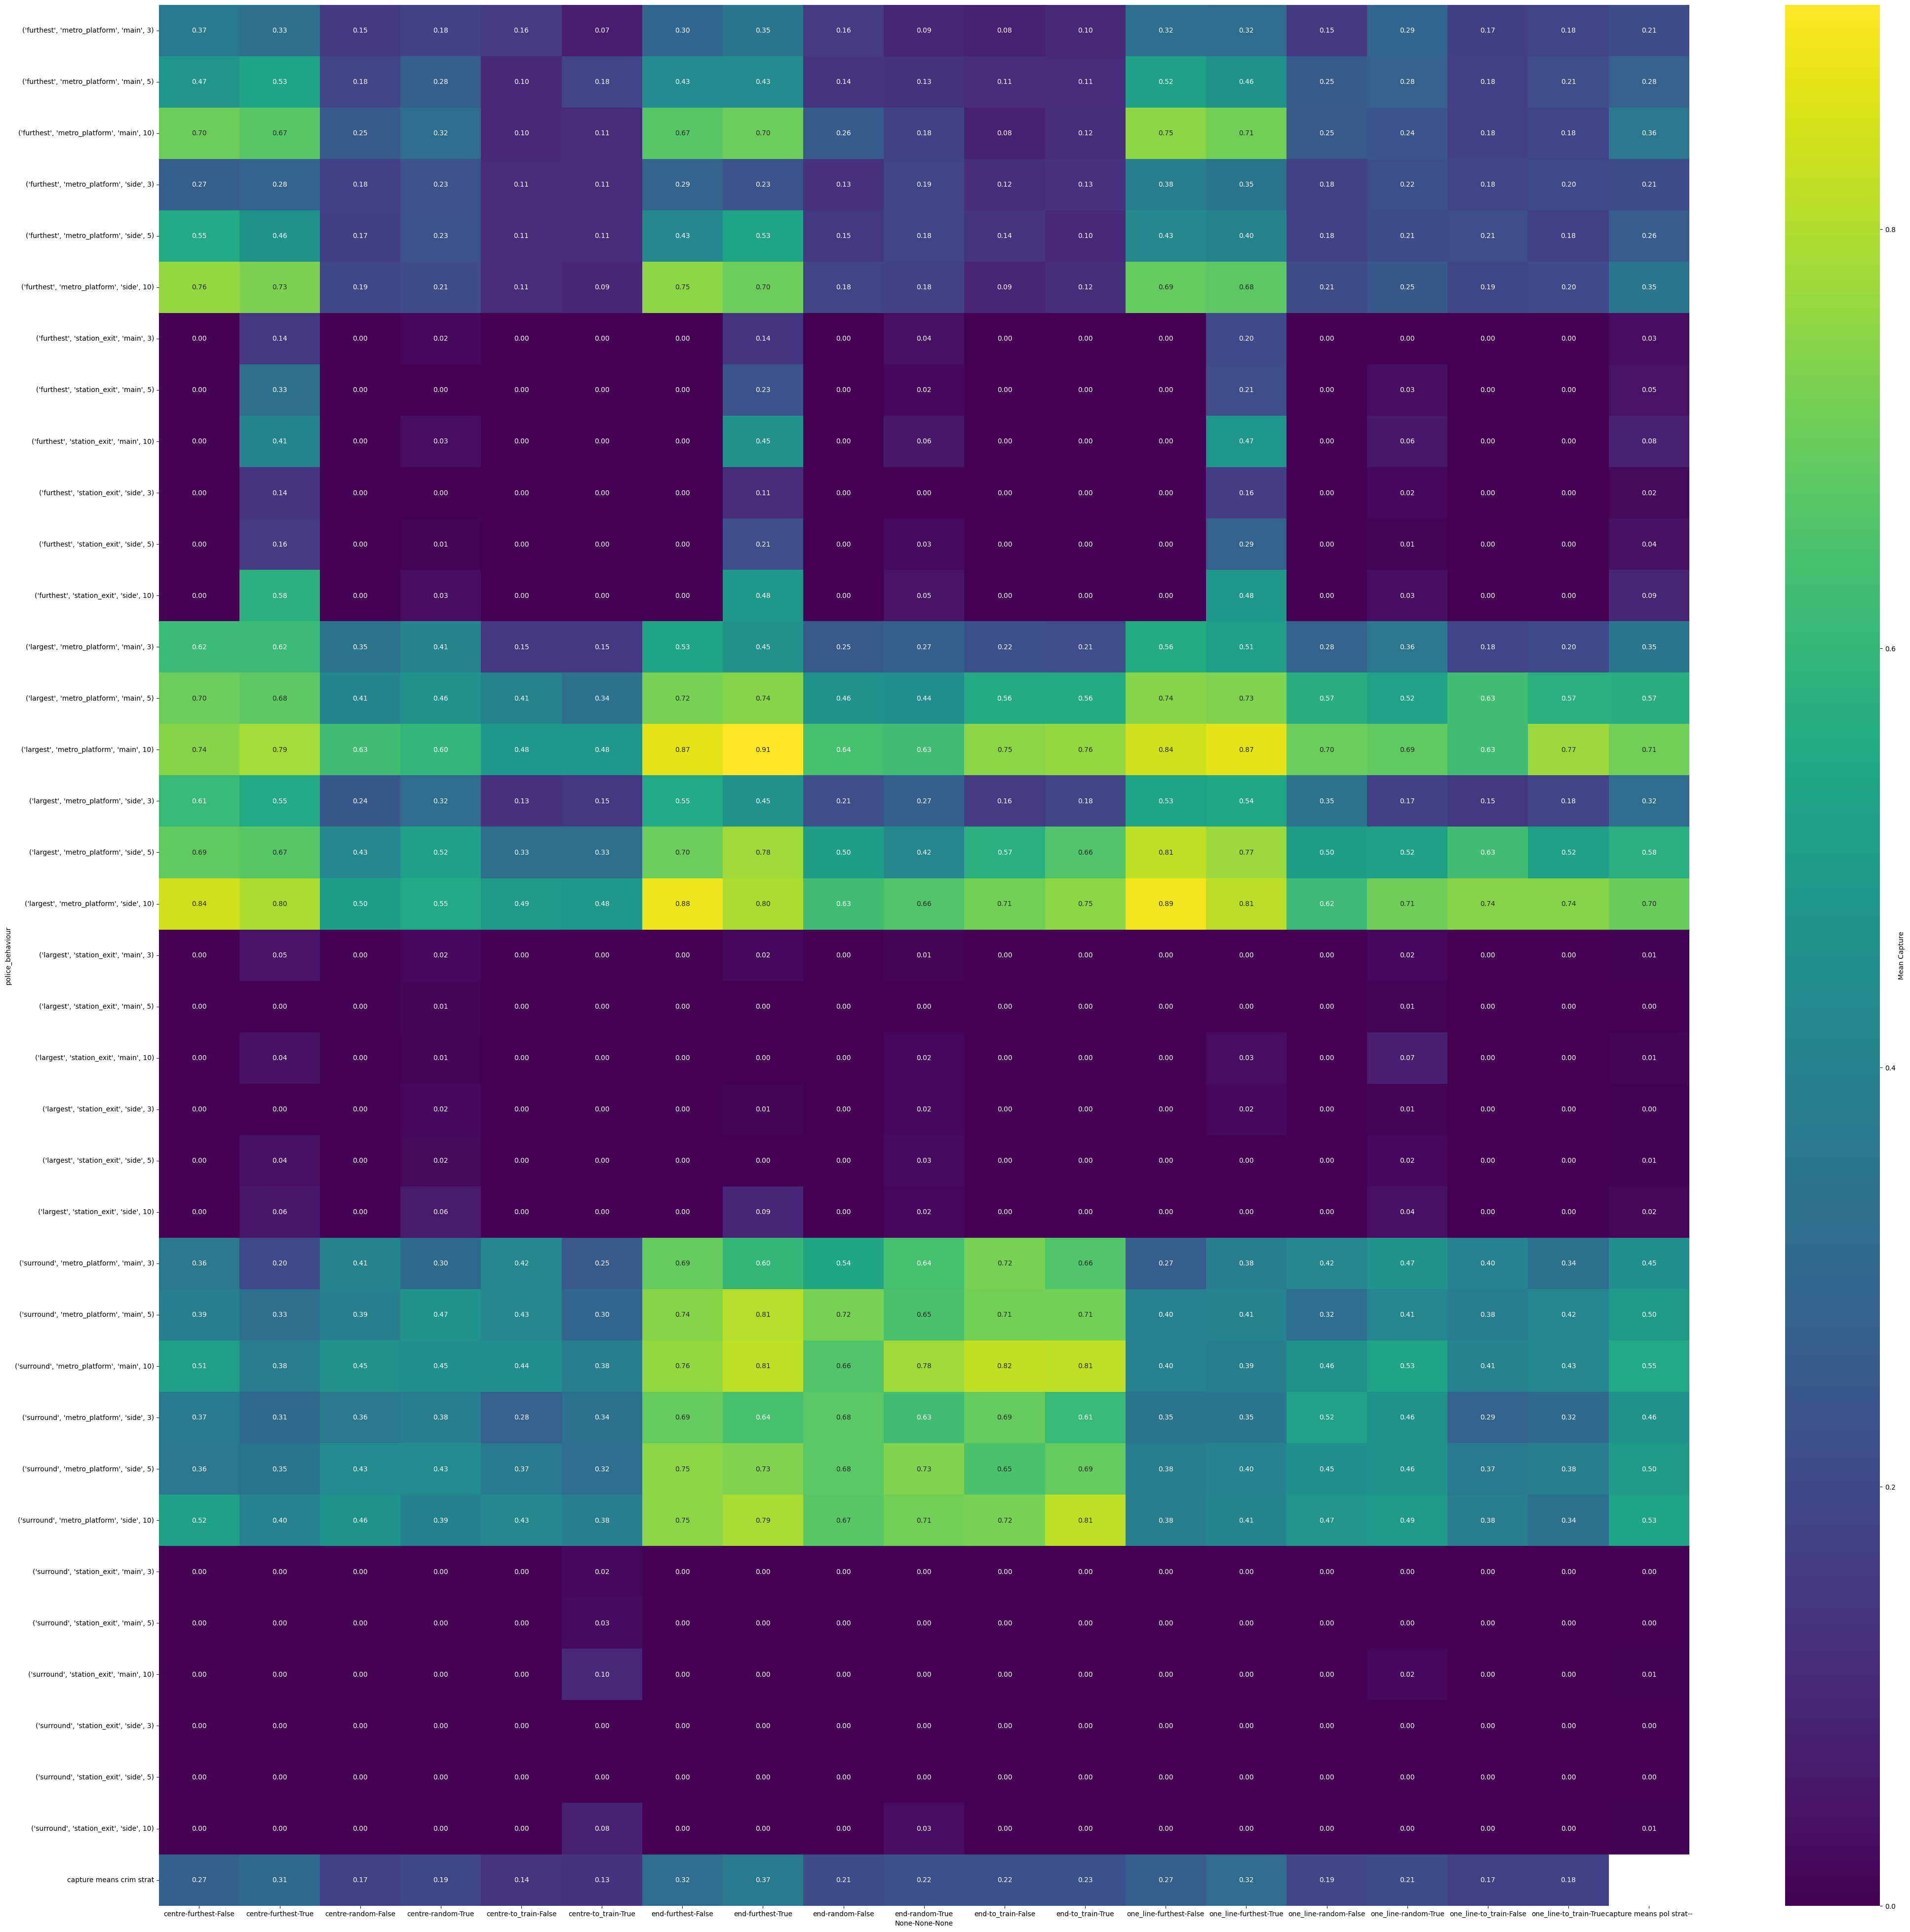

In [11]:
# Create a new column with unique combinations of a, b, c
combined_inout['police_behaviour'] = combined_inout[['pol_strat','pol_guarding', 'Police_entrance', 'units']].apply(lambda row: tuple(row), axis=1)

# Create a new column with unique combinations of d and e
combined_inout['criminal_behaviour'] = combined_inout[['crim_pos','crim_strat', 'crim_bounded_rat']].apply(lambda row: tuple(row), axis=1)

# Group by the unique combinations of a, b, c and d, e, then calculate the mean capture for each group
result_table = combined_inout.groupby(['police_behaviour', 'criminal_behaviour'])['capture'].mean().reset_index()

# Pivot the table to get the desired format
mean_capture_pivot = result_table.pivot(index='police_behaviour', columns='criminal_behaviour', values='capture')

# Sort rows and columns
mean_capture_pivot.sort_index(axis=0, inplace=True)
mean_capture_pivot.sort_index(axis=1, inplace=True)

mean_capture_pivot = mean_capture_pivot.round(3)
# result_table_pivot



# Calculate row and column means
row_means = mean_capture_pivot.mean(axis=1)
col_means = mean_capture_pivot.mean(axis=0)

# Create a new column and row for row and column means
mean_capture_pivot['capture means pol strat'] = row_means
mean_capture_pivot.loc['capture means crim strat'] = col_means

# Use seaborn to create a heatmap with a color scale
plt.figure(figsize=(50, 50))
sns.heatmap(mean_capture_pivot, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Mean Capture'})
plt.savefig('Figures/noint_mean_cap_pivot.png',dpi=72)
plt.show()

In [38]:
# import numpy as np
# from scipy.optimize import linprog


# # Replace this with your actual payoff table (example data)
# payoff_table = np.random.rand(36, 18)

# # Number of strategies for players A and B
# num_strategies_A = len(payoff_table)
# num_strategies_B = len(payoff_table[0])

# # Objective function coefficients (negative because linprog minimizes)
# c = -np.ones(num_strategies_A + num_strategies_B)

# # Inequality matrix (Ax <= b)
# A = np.zeros((num_strategies_B, num_strategies_A + num_strategies_B))
# for i in range(num_strategies_B):
#     A[i, :num_strategies_A] = payoff_table[:, i]
#     A[i, num_strategies_A + i] = -1

# # Inequality vector
# b = np.zeros(num_strategies_B)

# # Bounds for decision variables (probabilities)
# x_bounds = (0, 1)
# prob_bounds = [x_bounds] * (num_strategies_A + num_strategies_B)

# # Solve the linear programming problem
# result = linprog(c, A_ub=A, b_ub=b, bounds=prob_bounds, method='highs')

# # Extract the mixed strategies for players A and B
# mixed_strategy_A = result.x[:num_strategies_A]
# mixed_strategy_B = result.x[num_strategies_A:]

# # # Extract the mixed strategy for Player A as a DataFrame
# # # mixed_strategy_A = pd.DataFrame({'Strategy': range(1, num_strategies_A + 1), 'Probability': result.x[:num_strategies_A]})
# # mixed_strategy_A = pd.DataFrame({'Strategy': range(1, num_strategies_A + 1), 'Probability': result.x[:num_strategies_A] / result.x[:num_strategies_A].sum()})

# # # Extract the mixed strategy for Player B
# # mixed_strategy_B = result.x[num_strategies_A:]

# # Print the results
# # print("Mixed Nash Equilibrium for Player A:")
# mixed_strategy_A
# # print("\nMixed Nash Equilibrium for Player B:", mixed_strategy_B)

In [42]:
mean_capture_pivot.to_csv('../no_interaction_28112023/table_mean_capture_pivot.csv', index=False)

In [44]:
mean_capture_pivot.round(2)

centre                              \
                                     furthest       random       to_train   
                                        False  True  False  True    False   
police_behaviour                                                            
(furthest, metro_platform, main, 3)      0.37  0.33   0.15  0.18     0.16   
(furthest, metro_platform, main, 5)      0.47  0.53   0.18  0.28     0.10   
(furthest, metro_platform, main, 10)     0.70  0.67   0.25  0.32     0.10   
(furthest, metro_platform, side, 3)      0.27  0.28   0.18  0.23     0.11   
(furthest, metro_platform, side, 5)      0.55  0.46   0.17  0.23     0.11   
(furthest, metro_platform, side, 10)     0.76  0.73   0.19  0.21     0.11   
(furthest, station_exit, main, 3)        0.00  0.14   0.00  0.02     0.00   
(furthest, station_exit, main, 5)        0.00  0.33   0.00  0.00     0.00   
(furthest, station_exit, main, 10)       0.00  0.41   0.00  0.03     0.00   
(furthest, station_exit, side, 3)        0.00  0.14   0.00  0.00     0.00   
(furthest, station_exit, side, 5)        0.00  0.16   0.00  0.01     0.00   
(furthest, station_exit, side, 10)       0.00  0.58   0.00  0.03     0.00   
(largest, metro_platform, main, 3)       0.62  0.62   0.35  0.41     0.15   
(largest, metro_platform, main, 5)       0.70  0.68   0.41  0.46     0.41   
(largest, metro_platform, main, 10)      0.74  0.79   0.63  0.60     0.48   
(largest, metro_platform, side, 3)       0.61  0.55   0.24  0.32     0.13   
(largest, metro_platform, side, 5)       0.68  0.67   0.43  0.52     0.33   
(largest, metro_platform, side, 10)      0.84  0.80   0.50  0.55     0.49   
(largest, station_exit, main, 3)         0.00  0.05   0.00  0.02     0.00   
(largest, station_exit, main, 5)         0.00  0.00   0.00  0.01     0.00   
(largest, station_exit, main, 10)        0.00  0.04   0.00  0.01     0.00   
(largest, station_exit, side, 3)         0.00  0.00   0.00  0.02     0.00   
(largest, station_exit, side, 5)         0.00  0.04   0.00  0.02     0.00   
(largest, station_exit, side, 10)        0.00  0.06   0.00  0.06     0.00   
(surround, metro_platform, main, 3)      0.36  0.20   0.41  0.30     0.42   
(surround, metro_platform, main, 5)      0.39  0.33   0.39  0.47     0.43   
(surround, metro_platform, main, 10)     0.51  0.38   0.45  0.45     0.44   
(surround, metro_platform, side, 3)      0.37  0.31   0.36  0.38     0.28   
(surround, metro_platform, side, 5)      0.36  0.35   0.44  0.43     0.37   
(surround, metro_platform, side, 10)     0.52  0.40   0.46  0.39     0.43   
(surround, station_exit, main, 3)        0.00  0.00   0.00  0.00     0.00   
(surround, station_exit, main, 5)        0.00  0.00   0.00  0.00     0.00   
(surround, station_exit, main, 10)       0.00  0.00   0.00  0.00     0.00   
(surround, station_exit, side, 3)        0.00  0.00   0.00  0.00     0.00   
(surround, station_exit, side, 5)        0.00  0.00   0.00  0.00     0.00   
(surround, station_exit, side, 10)       0.00  0.00   0.00  0.00     0.00   
capture means crim strat                 0.27  0.31   0.17  0.19     0.14   

                                                end                     \
                                           furthest       random         
                                      True    False  True  False  True   
police_behaviour                                                         
(furthest, metro_platform, main, 3)   0.07     0.30  0.35   0.16  0.09   
(furthest, metro_platform, main, 5)   0.18     0.44  0.44   0.14  0.13   
(furthest, metro_platform, main, 10)  0.11     0.67  0.70   0.26  0.18   
(furthest, metro_platform, side, 3)   0.11     0.29  0.23   0.13  0.19   
(furthest, metro_platform, side, 5)   0.11     0.43  0.53   0.15  0.18   
(furthest, metro_platform, side, 10)  0.09     0.75  0.70   0.18  0.18   
(furthest, station_exit, main, 3)     0.00     0.00  0.14   0.00  0.04   
(furthest, station_exit, main, 5)     0.00     0.00  0.23   0.00  0

In [30]:
minimum1 = []

for index, row in mean_capture_pivot.iterrows():
    minimum1.append(row.min())

conservative1 = max(minimum1)

# Find the index corresponding to the maximum value
index_of_conservative1 = minimum1.index(conservative1)

print("Conservative Value:", conservative1)
print("Index of Conservative Value:", index_of_conservative1)

Conservative Value: 0.481
Index of Conservative Value: 14


In [31]:
minimum1 = []

for index, row in mean_capture_pivot.iterrows():
    minimum1.append(row.min())

conservative1 = max(minimum1)

# Find the index corresponding to the maximum value
index_of_conservative1 = minimum1.index(conservative1)

print("Conservative Value:", conservative1)
print("Index of Conservative Value:", index_of_conservative1)

Conservative Value: 0.481
Index of Conservative Value: 14


In [32]:
minimum_rows = []

for index, row in mean_capture_pivot.iterrows():
    minimum_rows.append(row.min())

conservative_row_value = max(minimum_rows)

# Find the index corresponding to the maximum row minimum value
index_of_conservative_row = minimum_rows.index(conservative_row_value)

print("Conservative Row Value:", conservative_row_value)
print("Index of Conservative Row Value:", index_of_conservative_row)


Conservative Row Value: 0.481
Index of Conservative Row Value: 14


In [26]:
# maximum2 = []

# for column, series in mean_capture_pivot.iteritems():
#     maximum2.append(series.max())

# conservative2 = min(maximum2)

# # Find the column number corresponding to the minimum value
# column_of_conservative2 = maximum2.index(conservative2)

# print("Conservative2:", conservative2)
# print("Column Number of Conservative2:", column_of_conservative2)

maximum2 = []

for column, series in mean_capture_pivot.iteritems():
    maximum2.append(series.min())

conservative2 = max(maximum2)

# Find the column number corresponding to the minimum value
column_of_conservative2 = maximum2.index(conservative2)

print("Conservative2:", conservative2)
print("Column Number of Conservative2:", column_of_conservative2)


Conservative2: 0.0
Column Number of Conservative2: 0


In [27]:
mean_capture_pivot.columns[0]

('centre', 'furthest', False)

In [28]:
mean_capture_pivot

centre                                \
                                     furthest        random        to_train   
                                        False   True  False   True    False   
police_behaviour                                                              
(furthest, metro_platform, main, 3)     0.370  0.330  0.154  0.180    0.157   
(furthest, metro_platform, main, 5)     0.472  0.529  0.184  0.276    0.102   
(furthest, metro_platform, main, 10)    0.704  0.667  0.252  0.320    0.102   
(furthest, metro_platform, side, 3)     0.269  0.284  0.179  0.229    0.111   
(furthest, metro_platform, side, 5)     0.546  0.462  0.167  0.231    0.111   
(furthest, metro_platform, side, 10)    0.759  0.729  0.192  0.208    0.111   
(furthest, station_exit, main, 3)       0.000  0.144  0.000  0.021    0.000   
(furthest, station_exit, main, 5)       0.000  0.333  0.000  0.000    0.000   
(furthest, station_exit, main, 10)      0.000  0.414  0.000  0.030    0.000   
(furthest, station_exit, side, 3)       0.000  0.141  0.000  0.000    0.000   
(furthest, station_exit, side, 5)       0.000  0.158  0.000  0.010    0.000   
(furthest, station_exit, side, 10)      0.000  0.580  0.000  0.033    0.000   
(largest, metro_platform, main, 3)      0.620  0.619  0.346  0.408    0.148   
(largest, metro_platform, main, 5)      0.704  0.683  0.411  0.457    0.407   
(largest, metro_platform, main, 10)     0.741  0.786  0.630  0.596    0.481   
(largest, metro_platform, side, 3)      0.611  0.548  0.245  0.320    0.130   
(largest, metro_platform, side, 5)      0.685  0.667  0.426  0.519    0.333   
(largest, metro_platform, side, 10)     0.843  0.796  0.500  0.548    0.491   
(largest, station_exit, main, 3)        0.000  0.048  0.000  0.021    0.000   
(largest, station_exit, main, 5)        0.000  0.000  0.000  0.011    0.000   
(largest, station_exit, main, 10)       0.000  0.041  0.000  0.010    0.000   
(largest, station_exit, side, 3)        0.000  0.000  0.000  0.021    0.000   
(largest, station_exit, side, 5)        0.000  0.038  0.000  0.022    0.000   
(largest, station_exit, side, 10)       0.000  0.059  0.000  0.063    0.000   
(surround, metro_platform, main, 3)     0.361  0.204  0.406  0.305    0.417   
(surround, metro_platform, main, 5)     0.389  0.327  0.393  0.471    0.426   
(surround, metro_platform, main, 10)    0.509  0.379  0.454  0.453    0.444   
(surround, metro_platform, side, 3)     0.370  0.311  0.364  0.382    0.278   
(surround, metro_platform, side, 5)     0.361  0.350  0.435  0.433    0.370   
(surround, metro_platform, side, 10)    0.519  0.402  0.462  0.394    0.426   
(surround, station_exit, main, 3)       0.000  0.000  0.000  0.000    0.000   
(surround, station_exit, main, 5)       0.000  0.000  0.000  0.000    0.000   
(surround, station_exit, main, 10)      0.000  0.000  0.000  0.000    0.000   
(surround, station_exit, side, 3)       0.000  0.000  0.000  0.000    0.000   
(surround, station_exit, side, 5)       0.000  0.000  0.000  0.000    0.000   
(surround, station_exit, side, 10)      0.000  0.000  0.000  0.000    0.000   

                                                 end                       \
                                            furthest        random          
                                       True    False   True  False   True   
police_behaviour                                                            
(furthest, metro_platform, main, 3)   0.074    0.296  0.352  0.157  0.094   
(furthest, metro_platform, main, 5)   0.185    0.435  0.435  0.139  0.132   
(furthest, metro_platform, main, 10)  0.111    0.667  0.704  0.259  0.179   
(furthest, metro_platform, side, 3)   0.111    0.287  0.231  0.130  0.187   
(furthest, metro_platform, side, 5)   0.111    0.426  0.528  0.148  0.185   
(furthest, metro_platform, side, 10)  0.093    0.750  0.704  0.185  0.179   
(furthest, station_exit, main, 3)     0.000    0.000  0.140  0.000  0.037   
(furthest, station_exit, main, 

8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8


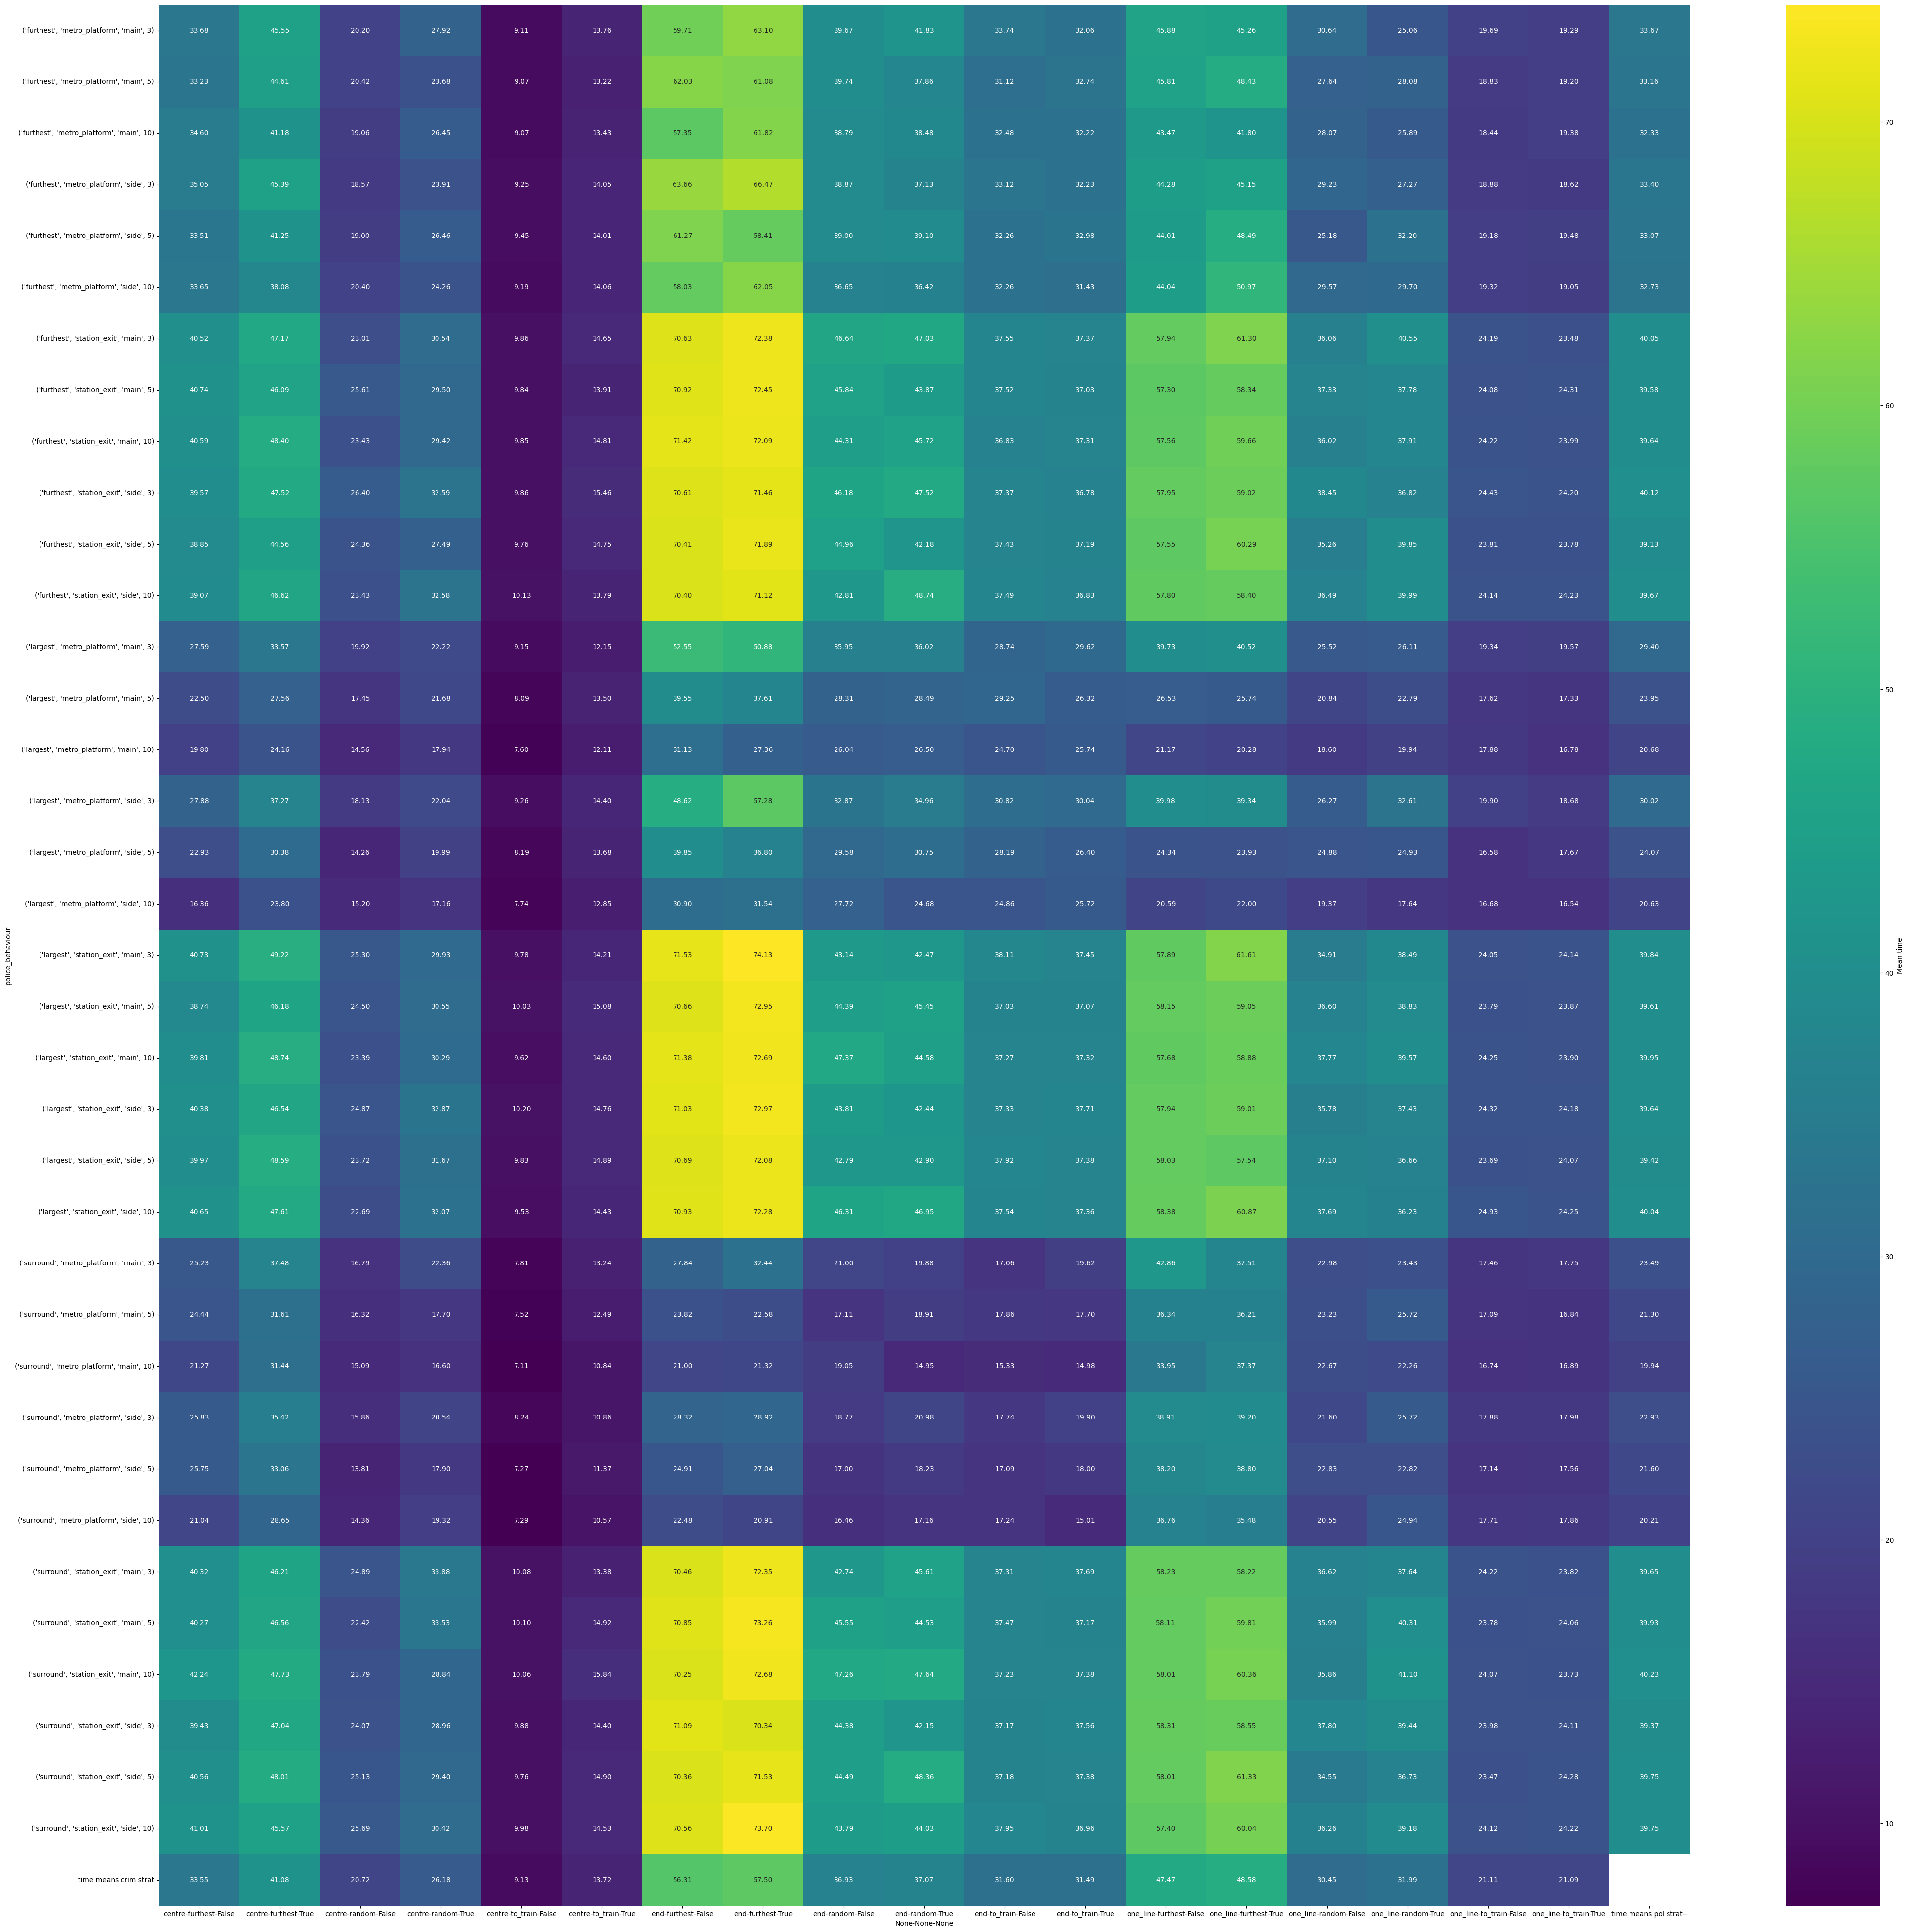

In [25]:
# Create a new column with unique combinations of a, b, c
combined_inout['police_behaviour'] = combined_inout[['pol_strat','pol_guarding', 'Police_entrance', 'units']].apply(lambda row: tuple(row), axis=1)

# Create a new column with unique combinations of d and e
combined_inout['criminal_behaviour'] = combined_inout[['crim_pos','crim_strat', 'crim_bounded_rat']].apply(lambda row: tuple(row), axis=1)

# Group by the unique combinations of a, b, c and d, e, then calculate the mean capture for each group
result_table = combined_inout.groupby(['police_behaviour', 'criminal_behaviour'])['time'].mean().reset_index()

# Pivot the table to get the desired format
mean_capture_pivot = result_table.pivot(index='police_behaviour', columns='criminal_behaviour', values='time')

# Sort rows and columns
mean_capture_pivot.sort_index(axis=0, inplace=True)
mean_capture_pivot.sort_index(axis=1, inplace=True)

mean_capture_pivot = mean_capture_pivot.round(3)
# result_table_pivot

# Calculate row and column means
row_means = mean_capture_pivot.mean(axis=1)
col_means = mean_capture_pivot.mean(axis=0)

# Create a new column and row for row and column means
mean_capture_pivot['time means pol strat'] = row_means
mean_capture_pivot.loc['time means crim strat'] = col_means

# Use seaborn to create a heatmap with a color scale
plt.figure(figsize=(50, 50))
sns.heatmap(mean_capture_pivot, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Mean time'})
plt.savefig('Figures/noint_mean_time_pivot.png')
# plt.show()

In [160]:
# first_row = mean_capture_pivot.iloc[1, :]
# first_row.max()
minimum1=[]
for index, row in mean_capture_pivot.iteritems():
    minimum1.append(row.min())
    
conservative1=max(minimum1)
conservative1

0.0

In [50]:
# Create a new column with unique combinations of a, b, c
combined_inout['police_behaviour'] = combined_inout[['pol_strat','pol_guarding', 'Police_entrance', 'units', 'P_multiple_at_station']].apply(lambda row: tuple(row), axis=1)

# Create a new column with unique combinations of d and e
combined_inout['criminal_behaviour'] = combined_inout[['crim_pos','crim_strat', 'crim_bounded_rat', 'crim_max_diverge']].apply(lambda row: tuple(row), axis=1)

# Group by the unique combinations of a, b, c and d, e, then calculate the mean capture for each group
result_table = combined_inout.groupby(['police_behaviour', 'criminal_behaviour'])['capture'].mean().reset_index()

# Sort the result_table by the mean capture values in descending order
mean_capture_df = result_table.sort_values(by='capture', ascending=False)

In [51]:
mean_capture_df[mean_capture_df['capture'] > 0.75]

police_behaviour               criminal_behaviour  \
259   (largest, metro_platform, main, 10, 5)        (end, furthest, True, 10)   
318   (largest, metro_platform, side, 10, 5)  (one_line, furthest, False, 10)   
312   (largest, metro_platform, side, 10, 5)       (end, furthest, False, 10)   
258   (largest, metro_platform, main, 10, 5)       (end, furthest, False, 10)   
265   (largest, metro_platform, main, 10, 5)   (one_line, furthest, True, 10)   
306   (largest, metro_platform, side, 10, 5)    (centre, furthest, False, 10)   
264   (largest, metro_platform, main, 10, 5)  (one_line, furthest, False, 10)   
478  (surround, metro_platform, main, 10, 5)       (end, to_train, False, 10)   
533  (surround, metro_platform, side, 10, 5)        (end, to_train, True, 10)   
300    (largest, metro_platform, side, 5, 5)  (one_line, furthest, False, 10)   
475  (surround, metro_platform, main, 10, 5)        (end, furthest, True, 10)   
479  (surround, metro_platform, main, 10, 5)        (end, to_train, True, 10)   
319   (largest, metro_platform, side, 10, 5)   (one_line, furthest, True, 10)   
457   (surround, metro_platform, main, 5, 5)        (end, furthest, True, 10)   
313   (largest, metro_platform, side, 10, 5)        (end, furthest, True, 10)   
307   (largest, metro_platform, side, 10, 5)     (centre, furthest, True, 10)   
529  (surround, metro_platform, side, 10, 5)        (end, furthest, True, 10)   
253   (largest, metro_platform, main, 10, 5)     (centre, furthest, True, 10)   
295    (largest, metro_platform, side, 5, 5)        (end, furthest, True, 10)   
477  (surround, metro_platform, main, 10, 5)          (end, random, True, 10)   
301    (largest, metro_platform, side, 5, 5)   (one_line, furthest, True, 10)   
269   (largest, metro_platform, main, 10, 5)   (one_line, to_train, True, 10)   
263   (largest, metro_platform, main, 10, 5)        (end, to_train, True, 10)   
90   (furthest, metro_platform, side, 10, 5)    (centre, furthest, False, 10)   
474  (surround, metro_platform, main, 10, 5)       (end, furthest, False, 10)   

      capture  
259  0.907407  
318  0.888889  
312  0.879630  
258  0.870370  
265  0.869159  
306  0.842593  
264  0.842593  
478  0.824074  
533  0.814815  
300  0.814815  
475  0.814815  
479  0.814815  
319  0.813084  
457  0.805556  
313  0.796296  
307  0.796117  
529  0.787037  
253  0.786408  
295  0.777778  
477  0.775701  
301  0.771429  
269  0.768519  
263  0.759259  
90   0.759259  
474  0.759259

In [21]:
filtered_df = mean_capture_df[mean_capture_df['capture'] >  base_inout['capture'].mean()]
criminal_beh_frequency = filtered_df['police_behaviour'].value_counts().reset_index()

# Rename the columns for clarity
criminal_beh_frequency.columns = ['police_behaviour', 'frequency']

# unique_values_frequency = unique_values_frequency.rename(columns={'police_behaviour': 'police_behviour  \n  testttt<br>ttestttt'})
criminal_beh_frequency = criminal_beh_frequency.rename(columns={'police_behaviour': 'police_behaviour<br>(strat, guarding, entrance, units, units_at_station)'})

from IPython.display import display, HTML
# Convert entire DataFrame to HTML, and have it rendered
display(HTML(criminal_beh_frequency.to_html(escape=False)))

In [22]:
filtered_df = mean_capture_df[mean_capture_df['capture'] > base_inout['capture'].mean()]
police_beh_frequency = filtered_df['criminal_behaviour'].value_counts().reset_index()

# Rename the columns for clarity
police_beh_frequency.columns = ['criminal_behaviour', 'frequency']

# unique_values_frequency = unique_values_frequency.rename(columns={'police_behaviour': 'police_behviour  \n  testttt<br>ttestttt'})
police_beh_frequency = police_beh_frequency.rename(columns={'criminal_behaviour': 'criminal_behaviour<br>(init_pos, strat, panic, max_diverge)'})

from IPython.display import display, HTML
# Convert entire DataFrame to HTML, and have it rendered
display(HTML(police_beh_frequency.to_html(escape=False)))

# Worst/best performing strategy

In [23]:
group_mean_capture = combined_inout.groupby(['scenario',  'crim_pos',
       'crim_strat', 'crim_bounded_rat', 'crim_max_diverge', 'pol_strat',
       'pol_guarding', 'Police_entrance', 'units', 'P_multiple_at_station'])['capture'].mean().reset_index(name='mean_capture')

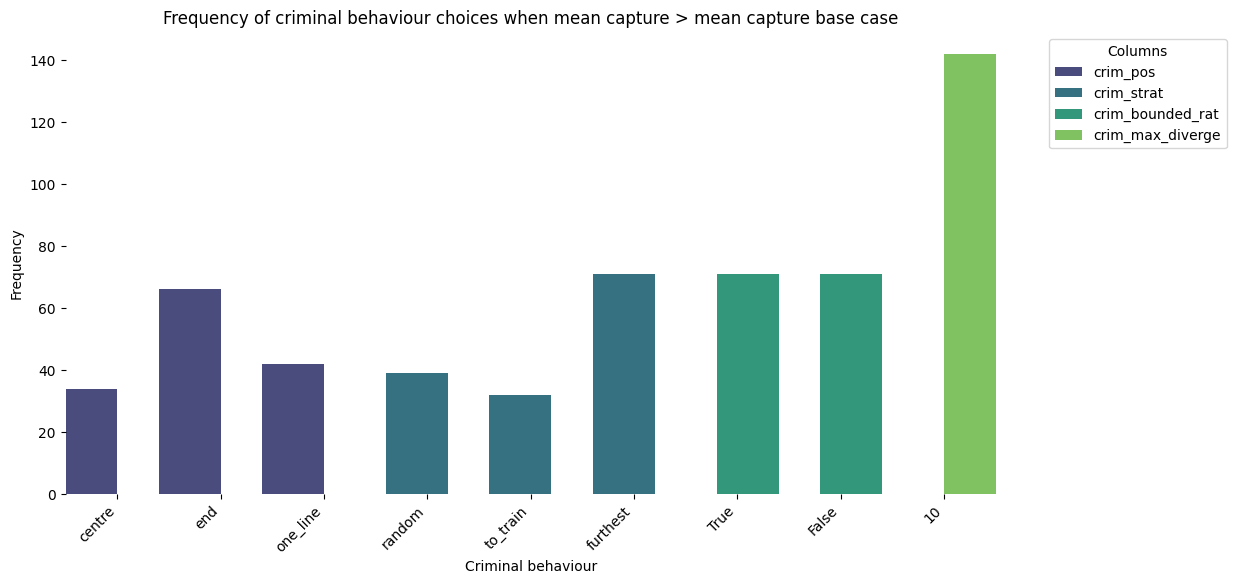

In [24]:
threshold= base_inout['capture'].mean()
mean_above_base = group_mean_capture[group_mean_capture['mean_capture'] > threshold]

melted_df = pd.melt(mean_above_base, id_vars=['scenario'], value_vars=['crim_pos', 'crim_strat', 'crim_bounded_rat','crim_max_diverge'])


# Plot the bar chart using seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='value', hue='variable', data=melted_df, dodge=True, palette='viridis', saturation=0.75)  # Adjust dodge and palette

# Set the bar width
bar_width = 0.6
for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - bar_width

    # Change the bar width
    patch.set_width(bar_width)

    # Recenter the bar
    patch.set_x(patch.get_x() + diff * .5)

plt.xlabel('Criminal behaviour')
plt.ylabel('Frequency')
plt.title('Frequency of criminal behaviour choices when mean capture > mean capture base case' )

# Add a legend with column names
legend_labels = melted_df['variable'].unique()
ax.legend(legend_labels, title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(frame_on=False)
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility

plt.show()

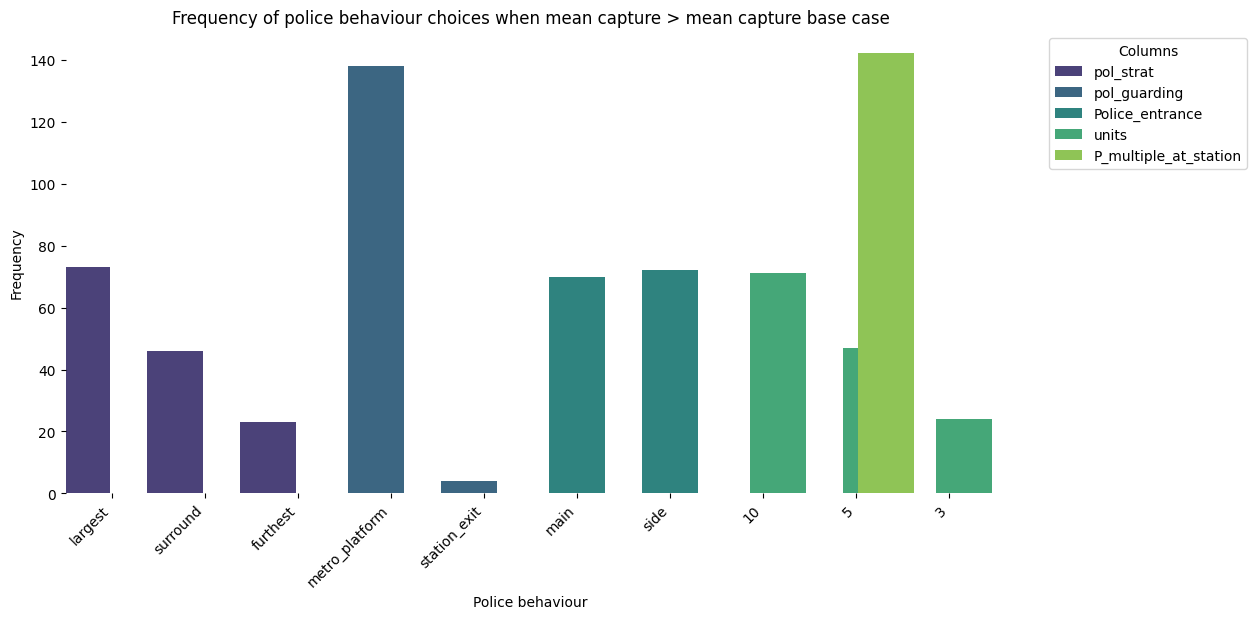

In [25]:
threshold= base_inout['capture'].mean()
mean_above_base = group_mean_capture[group_mean_capture['mean_capture'] > threshold]

melted_df = pd.melt(mean_above_base, id_vars=['scenario'], value_vars=['pol_strat',
       'pol_guarding', 'Police_entrance', 'units', 'P_multiple_at_station'])


# Plot the bar chart using seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='value', hue='variable', data=melted_df, dodge=True, palette='viridis', saturation=0.75)  # Adjust dodge and palette

# Set the bar width
bar_width = 0.6
for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - bar_width

    # Change the bar width
    patch.set_width(bar_width)

    # Recenter the bar
    patch.set_x(patch.get_x() + diff * .5)

plt.xlabel('Police behaviour')
plt.ylabel('Frequency')
plt.title('Frequency of police behaviour choices when mean capture > mean capture base case' )

# Add a legend with column names
legend_labels = melted_df['variable'].unique()
ax.legend(legend_labels, title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(frame_on=False)
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility


plt.show()

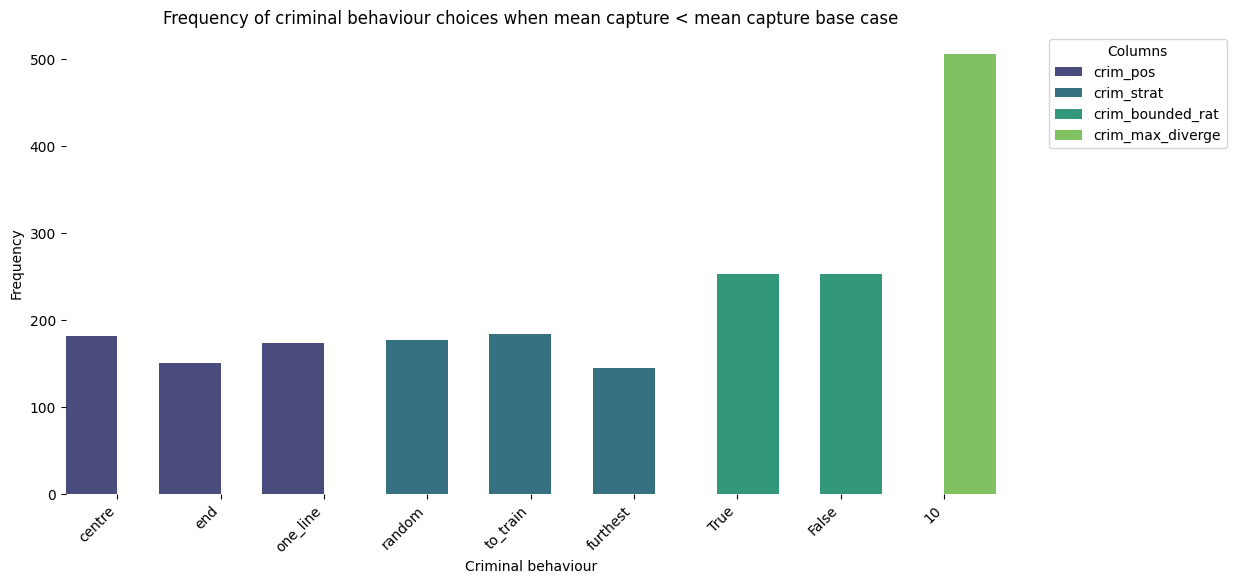

In [26]:
threshold= base_inout['capture'].mean()
mean_above_base = group_mean_capture[group_mean_capture['mean_capture'] < threshold]

melted_df = pd.melt(mean_above_base, id_vars=['scenario'], value_vars=['crim_pos', 'crim_strat', 'crim_bounded_rat','crim_max_diverge'])


# Plot the bar chart using seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='value', hue='variable', data=melted_df, dodge=True, palette='viridis', saturation=0.75)  # Adjust dodge and palette

# Set the bar width
bar_width = 0.6
for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - bar_width

    # Change the bar width
    patch.set_width(bar_width)

    # Recenter the bar
    patch.set_x(patch.get_x() + diff * .5)

plt.xlabel('Criminal behaviour')
plt.ylabel('Frequency')
plt.title('Frequency of criminal behaviour choices when mean capture < mean capture base case' )

# Add a legend with column names
legend_labels = melted_df['variable'].unique()
ax.legend(legend_labels, title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(frame_on=False)
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility


plt.show()

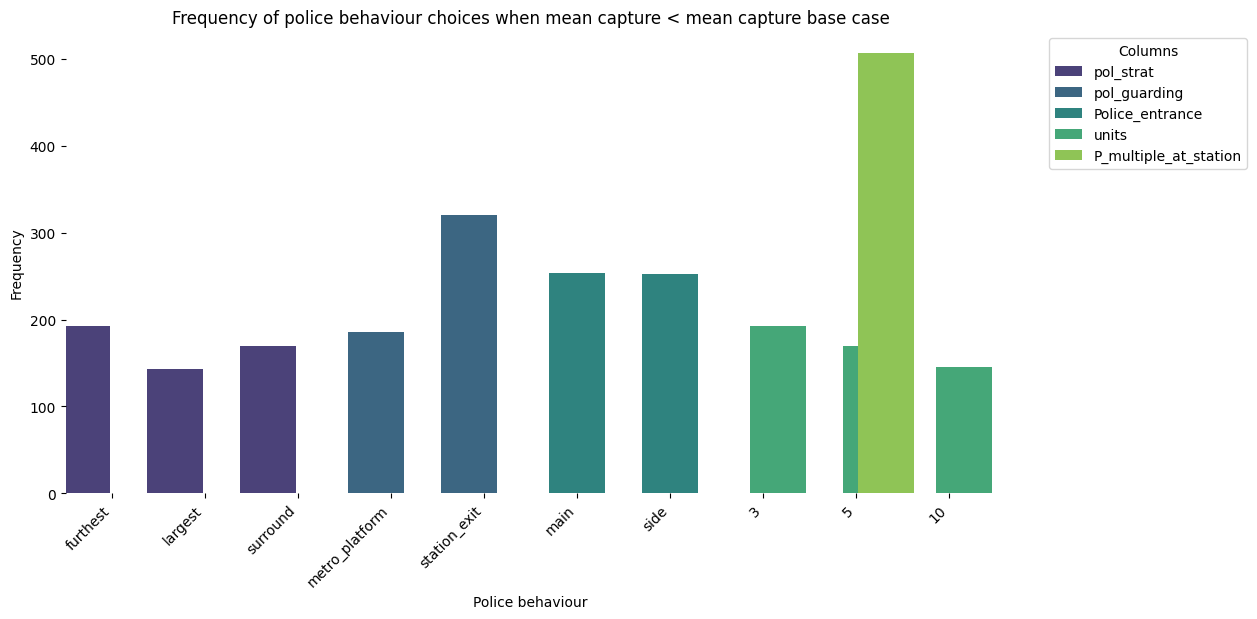

In [27]:
threshold= base_inout['capture'].mean()
mean_above_base = group_mean_capture[group_mean_capture['mean_capture'] < threshold]

melted_df = pd.melt(mean_above_base, id_vars=['scenario'], value_vars=['pol_strat',
       'pol_guarding', 'Police_entrance', 'units', 'P_multiple_at_station'])


# Plot the bar chart using seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='value', hue='variable', data=melted_df, dodge=True, palette='viridis', saturation=0.75)  # Adjust dodge and palette

# Set the bar width
bar_width = 0.6
for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - bar_width

    # Change the bar width
    patch.set_width(bar_width)

    # Recenter the bar
    patch.set_x(patch.get_x() + diff * .5)

plt.xlabel('Police behaviour')
plt.ylabel('Frequency')
plt.title('Frequency of police behaviour choices when mean capture < mean capture base case' )

# Add a legend with column names
legend_labels = melted_df['variable'].unique()
ax.legend(legend_labels, title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(frame_on=False)
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility


plt.show()

In [28]:
group_mean_capture_sorted = group_mean_capture.sort_values(by='mean_capture', ascending=False)

In [29]:
best_scen=group_mean_capture_sorted['scenario'].iloc[0]
best_scen

374

In [30]:
best=combined_inout[combined_inout['scenario']==best_scen]

# Uncertainties

In [86]:
combined_inout.columns

Index(['scenario', 'start_time', 'time', 'capture', 'escape', 'game_over',
       'criminal_goal', 'game_over_pos', 'criminal_passed_police',
       'police_gone_undercover', 'criminal_diverged_from_path',
       'criminal_tried_exits', 'criminal_seen_police', 'crim_Sguard_percent',
       'crim_Mguard_percent', 'init_call_delay', 'info_update_freq',
       'criminal_detection_police', 'police_start_pos100',
       'police_start_pos101', 'police_start_pos102', 'police_goal100',
       'police_goal101', 'police_goal102', 'police_changed_goal100',
       'police_changed_goal101', 'police_changed_goal102', 'time_minutes',
       'seconds', 'crim_pos', 'crim_strat', 'crim_bounded_rat',
       'crim_max_diverge', 'pol_strat', 'pol_guarding', 'Police_entrance',
       'units', 'P_multiple_at_station', 'police_start_pos103',
       'police_start_pos104', 'police_goal103', 'police_goal104',
       'police_changed_goal103', 'police_changed_goal104',
       'police_start_pos105', 'police_start_p

In [15]:
listy=['crim_Sguard_percent',
       'crim_Mguard_percent', 'init_call_delay']
for item in listy:
    grouped_df = combined_inout.groupby(item)[['capture','time']]

    # Calculate mean, std, and var for 'capture' within each group
    result_df = grouped_df.agg(['mean', 'std']).reset_index()

    # Rename the columns for clarity
    result_df.columns = [item, 'mean_capture', 'std_capture','mean_time', 'std_time']
    result_df=result_df.round(2)
    display(result_df)
    display(result_df.to_latex())

crim_Sguard_percent  mean_capture  std_capture  mean_time  std_time
0                   50          0.21         0.41      33.17     22.04
1                   70          0.23         0.42      33.02     21.99
2                   90          0.25         0.43      32.99     21.83

'\\begin{tabular}{lrrrrr}\n\\toprule\n{} &  crim\\_Sguard\\_percent &  mean\\_capture &  std\\_capture &  mean\\_time &  std\\_time \\\\\n\\midrule\n0 &                   50 &          0.21 &         0.41 &      33.17 &     22.04 \\\\\n1 &                   70 &          0.23 &         0.42 &      33.02 &     21.99 \\\\\n2 &                   90 &          0.25 &         0.43 &      32.99 &     21.83 \\\\\n\\bottomrule\n\\end{tabular}\n'

crim_Mguard_percent  mean_capture  std_capture  mean_time  std_time
0                   50          0.20         0.40      33.73     22.01
1                   70          0.23         0.42      32.95     21.90
2                   90          0.26         0.44      32.50     21.92

'\\begin{tabular}{lrrrrr}\n\\toprule\n{} &  crim\\_Mguard\\_percent &  mean\\_capture &  std\\_capture &  mean\\_time &  std\\_time \\\\\n\\midrule\n0 &                   50 &          0.20 &         0.40 &      33.73 &     22.01 \\\\\n1 &                   70 &          0.23 &         0.42 &      32.95 &     21.90 \\\\\n2 &                   90 &          0.26 &         0.44 &      32.50 &     21.92 \\\\\n\\bottomrule\n\\end{tabular}\n'

init_call_delay  mean_capture  std_capture  mean_time  std_time
0                1          0.28         0.45      30.27     22.85
1                3          0.23         0.42      32.83     21.76
2                6          0.18         0.38      36.10     20.80

'\\begin{tabular}{lrrrrr}\n\\toprule\n{} &  init\\_call\\_delay &  mean\\_capture &  std\\_capture &  mean\\_time &  std\\_time \\\\\n\\midrule\n0 &                1 &          0.28 &         0.45 &      30.27 &     22.85 \\\\\n1 &                3 &          0.23 &         0.42 &      32.83 &     21.76 \\\\\n2 &                6 &          0.18 &         0.38 &      36.10 &     20.80 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [11]:
for item in listy:
    print(item,'capture',np.cov(combined_inout[item],combined_inout['capture'])[0,1].round(2))
    print(item,'time',np.cov(combined_inout[item],combined_inout['time'])[0,1].round(2),'\n')

crim_Sguard_percent capture 0.22
crim_Sguard_percent time -1.23 

crim_Mguard_percent capture 0.37
crim_Mguard_percent time -8.25 

init_call_delay capture -0.09
init_call_delay time 4.9 



In [89]:
columns_of_interest =['crim_Sguard_percent',
       'crim_Mguard_percent', 'init_call_delay']


# columns_of_interest = ['pol_guarding']

# Group by the specified columns
grouped_df = combined_inout.groupby(columns_of_interest)

# Calculate the mean and standard deviation for the 'capture' variable within each group
result_df = grouped_df[['capture','time']].agg(['mean', 'std', 'var']).reset_index()

# Display the result
result_df.sort_values(by=('time', 'std'),ascending=False)

crim_Sguard_percent crim_Mguard_percent init_call_delay   capture  \
                                                                mean   
18                  90                  50               1  0.280859   
3                   50                  70               1  0.255361   
9                   70                  50               1  0.257546   
6                   50                  90               1  0.273898   
21                  90                  70               1  0.308806   
0                   50                  50               1  0.226740   
12                  70                  70               1  0.284543   
15                  70                  90               1  0.303822   
24                  90                  90               1  0.327869   
1                   50                  50               3  0.185446   
13                  70                  70               3  0.237946   
16                  70                  90               3  0.267005   
19                  90                  50               3  0.226437   
22                  90                  70               3  0.263981   
10                  70                  50               3  0.202265   
8                   50                  90               6  0.208709   
7                   50                  90               3  0.241190   
25                  90                  90               3  0.270133   
4                   50                  70               3  0.218616   
14                  70                  70               6  0.174765   
11                  70                  50               6  0.142410   
5                   50                  70               6  0.174853   
26                  90                  90               6  0.204715   
20                  90                  50               6  0.149863   
17                  70                  90               6  0.208692   
2                   50                  50               6  0.133880   
23                  90                  70               6  0.181712   

                             time                         
         std       var       mean        std         var  
18  0.449507  0.202056  31.376172  23.236422  539.931319  
3   0.436149  0.190226  30.437427  23.176186  537.135611  
9   0.437368  0.191291  30.885143  22.844400  521.866607  
6   0.446044  0.198955  29.634803  22.825875  521.020560  
21  0.462091  0.213529  30.367515  22.824836  520.973142  
0   0.418805  0.175397  30.850469  22.813861  520.472254  
12  0.451285  0.203658  29.593286  22.670226  513.939166  
15  0.459996  0.211597  29.891576  22.664811  513.693663  
24  0.469528  0.220457  29.356362  22.506107  506.524850  
1   0.388735  0.151115  33.904930  22.480532  505.374324  
13  0.425909  0.181399  33.050960  22.108266  488.775441  
16  0.442482  0.195790  32.165754  22.069363  487.056793  
19  0.418607  0.175232  33.149003  21.764552  473.695708  
22  0.440875  0.194371  32.465976  21.677584  469.917660  
10  0.401767  0.161417  33.540023  21.665769  469.405526  
8   0.406466  0.165215  36.061200  21.591423  466.189542  
7   0.427889  0.183089  32.188136  21.540208  463.980552  
25  0.444115  0.197238  32.244918  21.382303  457.202898  
4   0.413388  0.170890  32.781776  21.123604  446.206663  
14  0.379840  0.144279  36.017633  20.999255  440.968721  
11  0.349539  0.122177  36.794014  20.967166  439.622035  
5   0.379916  0.144336  36.156385  20.894490  436.579701  
26  0.403573  0.162871  35.698625  20.788835  432.175647  
20  0.357007  0.127454  36.532758  20.640381  426.025320  
17  0.406454  0.165204  35.285630  20.554132  422.472339  
2   0.340590  0.116001  36.581382  20.471853  419.096752  
23  0.385682  0.148751  35.737593  20.271631  410.939032

In [94]:
test=combined_inout['crim_Sguard_percent'].unique().tolist()
test

[50, 70, 90]

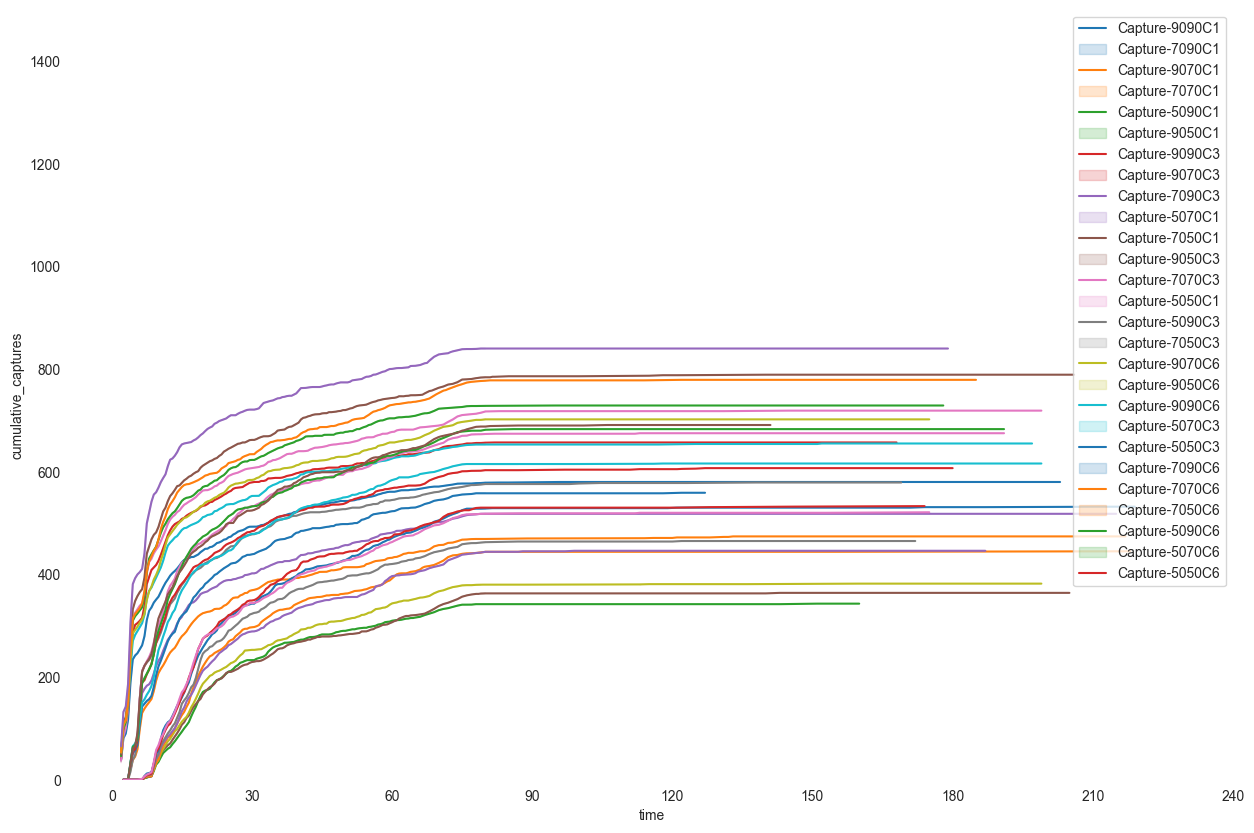

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

Sguard = combined_inout['crim_Sguard_percent'].unique().tolist()
Mguard = combined_inout['crim_Mguard_percent'].unique().tolist()
call = combined_inout['init_call_delay'].unique().tolist()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

legend_entries = []  # To store legend entries and corresponding maximum cumulative captures

for i, category in enumerate(Sguard):
    for j, guard in enumerate(Mguard):
        for c in call:
            # Filter the DataFrame based on the current category and guard
            df = combined_inout[
                (combined_inout[f'crim_Mguard_percent'] == int(category)) &
                (combined_inout[f'crim_Sguard_percent'] == int(guard)) &
                (combined_inout['init_call_delay'] == c)
            ]

            # Sort the DataFrame by 'time'
            df = df.sort_values(by='time')

            # Create a new column 'cumulative_captures' representing the cumulative sum of captures
            df['cumulative_captures'] = df['capture'].cumsum()

            # Store the legend entry and the maximum cumulative captures
            legend_entries.append((f'Capture-{category}{guard}C{c}', df['cumulative_captures'].max()))

            # Plot the line graph
            sns.lineplot(x='time', y='cumulative_captures', data=df, label=f'Capture-{category}{guard}C{c}', palette='viridis')
            # ax.axvline(x=70, color='grey', linestyle='--',)

# Sort the legend entries based on maximum cumulative captures
legend_entries.sort(key=lambda x: x[1], reverse=True)

# Set custom x-axis ticks
plt.xticks(range(0, 250, 30))

# Set the y-axis limit
plt.ylim(0, 1500)

# Remove the frame (border) around the main plot
ax.set(frame_on=False)

# Show legend
ax.legend([entry[0] for entry in legend_entries], loc='upper right')

plt.show()

In [33]:
combined_inout.columns

Index(['scenario', 'start_time', 'time', 'capture', 'escape', 'game_over',
       'criminal_goal', 'game_over_pos', 'criminal_passed_police',
       'police_gone_undercover', 'criminal_diverged_from_path',
       'criminal_tried_exits', 'criminal_seen_police', 'crim_Sguard_percent',
       'crim_Mguard_percent', 'init_call_delay', 'info_update_freq',
       'criminal_detection_police', 'police_start_pos100',
       'police_start_pos101', 'police_start_pos102', 'police_goal100',
       'police_goal101', 'police_goal102', 'police_changed_goal100',
       'police_changed_goal101', 'police_changed_goal102', 'time_minutes',
       'seconds', 'crim_pos', 'crim_strat', 'crim_bounded_rat',
       'crim_max_diverge', 'pol_strat', 'pol_guarding', 'Police_entrance',
       'units', 'P_multiple_at_station', 'police_start_pos103',
       'police_start_pos104', 'police_goal103', 'police_goal104',
       'police_changed_goal103', 'police_changed_goal104',
       'police_start_pos105', 'police_start_p

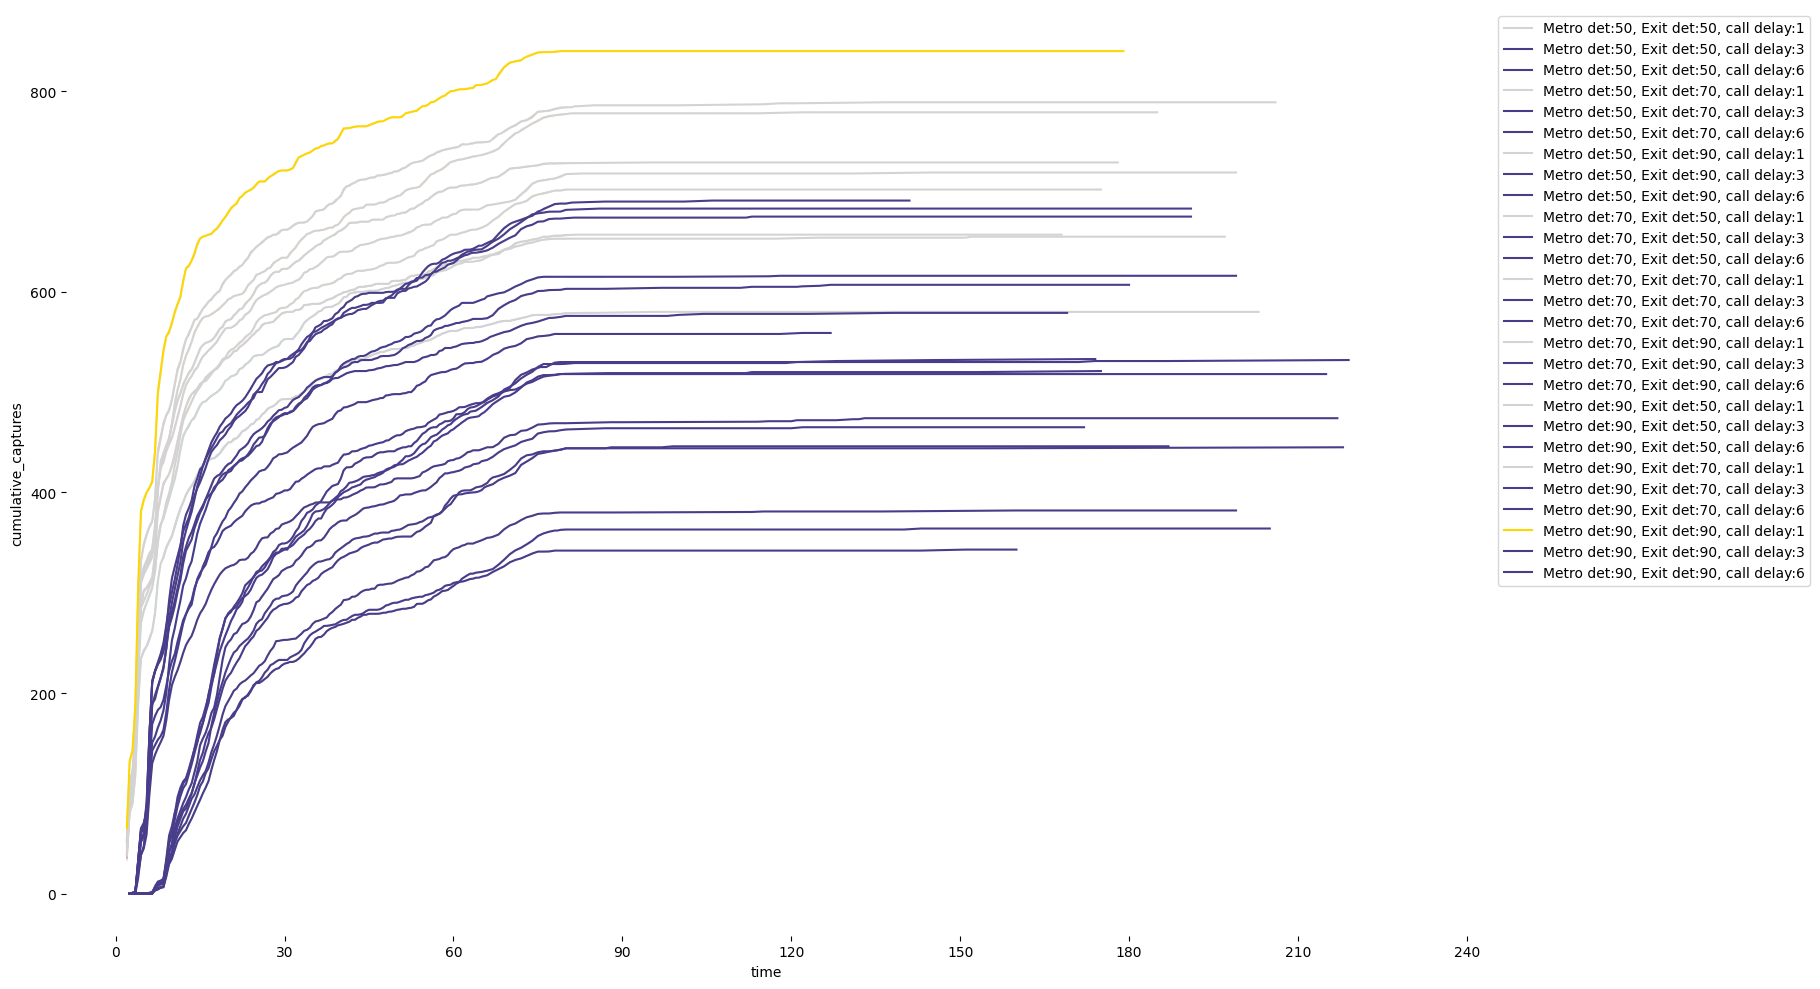

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

Sguard = ['50', '70', '90']
Mguard = ['50', '70', '90']
call = [1, 3, 6]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

max_cumulative_captures = float('-inf')
min_cumulative_captures = float('inf')

for i, category in enumerate(Sguard):
    for j, guard in enumerate(Mguard):
        for c in call:
            # Filter the DataFrame based on the current category and guard
            df = combined_inout[
                (combined_inout[f'crim_Mguard_percent'] == int(category.strip('M'))) &
                (combined_inout[f'crim_Sguard_percent'] == int(guard.strip('S'))) &
                (combined_inout['init_call_delay'] == c)
            ]

            # Sort the DataFrame by 'time'
            df = df.sort_values(by='time')

            # Create a new column 'cumulative_captures' representing the cumulative sum of captures
            df['cumulative_captures'] = df['capture'].cumsum()

            # Find the maximum and minimum cumulative captures
            max_capture = df['cumulative_captures'].max()
            min_capture = df['cumulative_captures'].min()

            # Update max and min cumulative captures if necessary
            if max_capture > max_cumulative_captures:
                max_cumulative_captures = max_capture
            if min_capture < min_cumulative_captures:
                min_cumulative_captures = min_capture

            # Plot the line graph
            sns.lineplot(x='time', y='cumulative_captures', data=df,
                         label=f'Metro det:{category}, Exit det:{guard}, call delay:{c}', palette='viridis')
            

# Set custom x-axis ticks
plt.xticks(range(0, 250, 30))

# Set the y-axis limit
# plt.ylim(0, 5000)

# Remove the frame (border) around the main plot
ax.set(frame_on=False)

# Set the color of lines with max and min cumulative captures
for line in ax.lines:
    max_line = max(line.get_ydata()) == max_cumulative_captures
    min_line = min(line.get_ydata()) == min_cumulative_captures

    if max_line:
        line.set_color('gold')
    elif min_line:
        line.set_color('darkslateblue')
    else:
        line.set_color('lightgray')  # For other lines


# Adjust layout to accommodate the legend
plt.tight_layout()

# Remove the frame (border) around the main plot
ax.set(frame_on=False)

# Show legend
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Save the figure with a tight bounding box
plt.savefig('Figures/noint_uncertainties1.png', bbox_inches='tight')

plt.show()

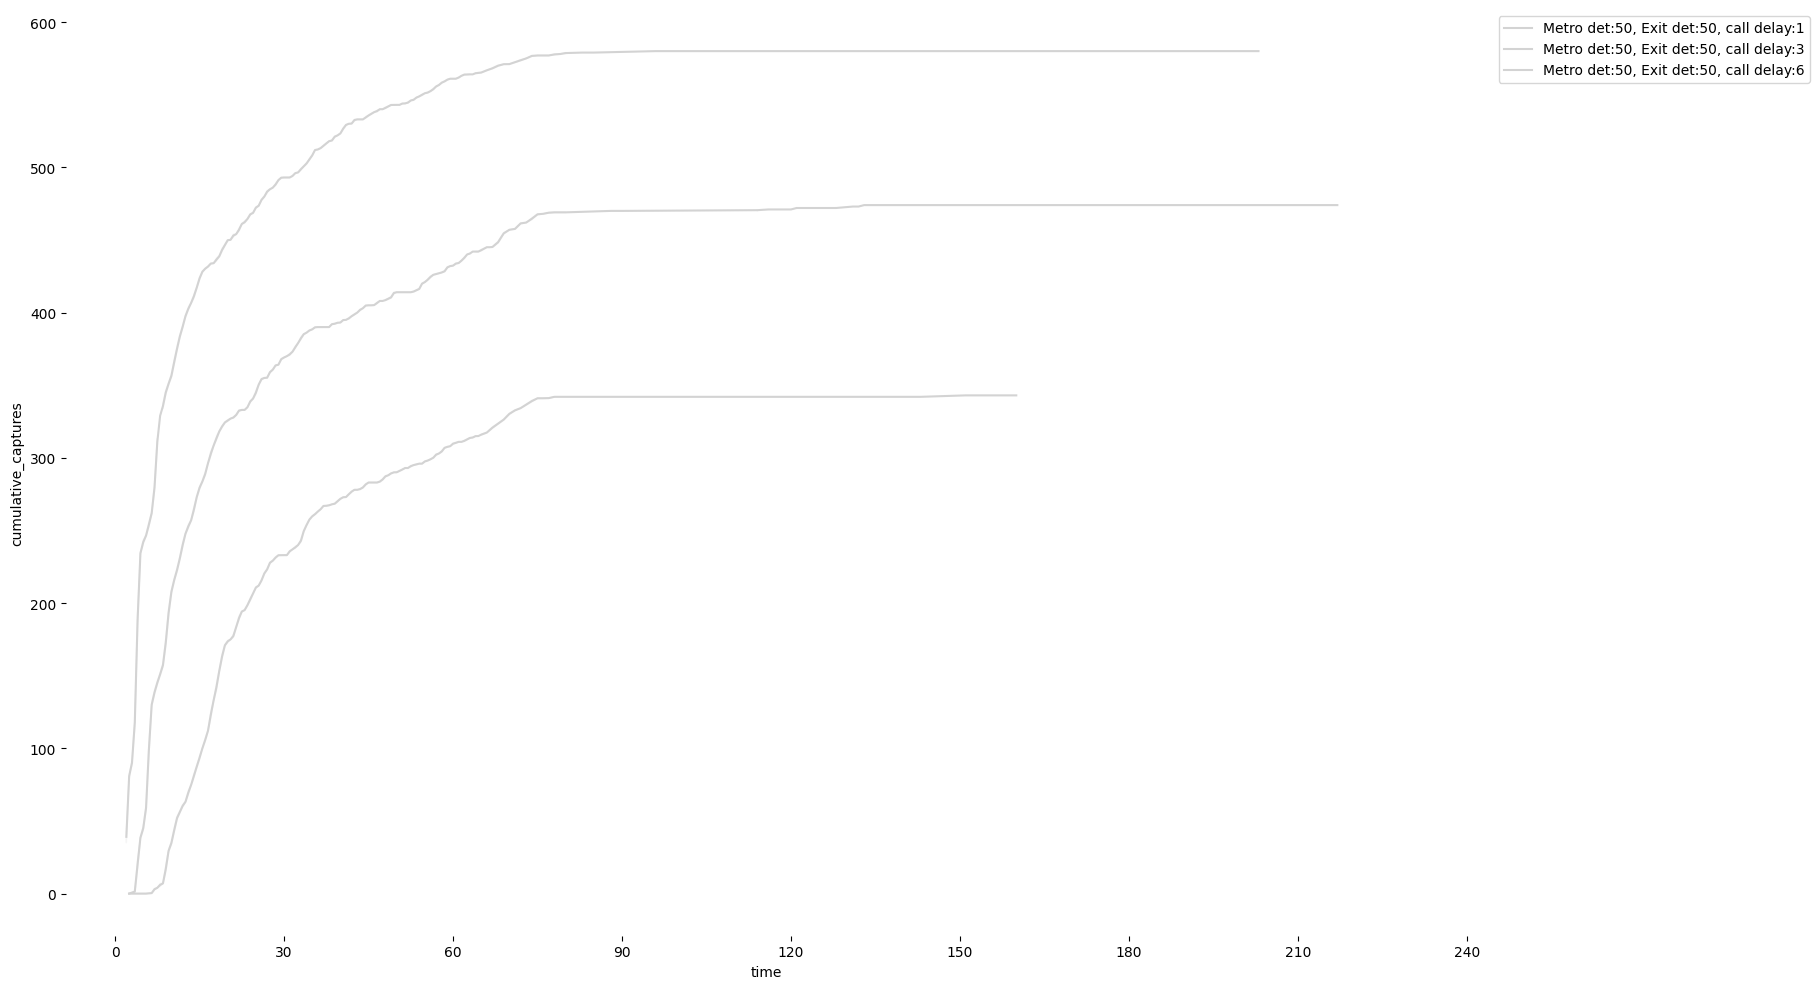

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

Sguard = ['25', '50', '75', '100']
Mguard = ['25', '50', '75', '100']
call = [1, 3, 6]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

max_cumulative_captures = float('-inf')
min_cumulative_captures = float('inf')

# Counter for darkslateblue and lightseagreen lines
darkslateblue_count = 0
lightseagreen_count = 0

for i, category in enumerate(Sguard):
    for j, guard in enumerate(Mguard):
        for c in call:
            # Filter the DataFrame based on the current category and guard
            df = combined_inout[
                (combined_inout[f'crim_Mguard_percent'] == int(category)) &
                (combined_inout[f'crim_Sguard_percent'] == int(guard)) &
                (combined_inout['init_call_delay'] == c)
            ]

            # Sort the DataFrame by 'time'
            df = df.sort_values(by='time')

            # Create a new column 'cumulative_captures' representing the cumulative sum of captures
            df['cumulative_captures'] = df['capture'].cumsum()

            # Find the maximum and minimum cumulative captures
            max_capture = df['cumulative_captures'].max()
            min_capture = df['cumulative_captures'].min()

            # Update max and min cumulative captures if necessary
            if max_capture > max_cumulative_captures:
                max_cumulative_captures = max_capture
            if min_capture < min_cumulative_captures:
                min_cumulative_captures = min_capture

            # Assign colors based on position
            if c == call[0]:
                color = 'lightseagreen' if darkslateblue_count == 0 else 'lightgray'
                darkslateblue_count += 1
            elif c == call[-1]:
                color = 'darkslateblue' if lightseagreen_count == 0 else 'lightgray'
                lightseagreen_count += 1
            else:
                color = 'lightgray'

            # Plot the line graph
            sns.lineplot(x='time', y='cumulative_captures', data=df,
                         label=f'Metro det:{category}, Exit det:{guard}, call delay:{c}', color=color)

# Set custom x-axis ticks
plt.xticks(range(0, 250, 30))

# Set the y-axis limit
# plt.ylim(0, 5000)

# Adjust layout to accommodate the legend
plt.tight_layout()

# Remove the frame (border) around the main plot
ax.set(frame_on=False)

# Show legend
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Save the figure with a tight bounding box
plt.savefig('Figures/noint_uncertainties2.png', bbox_inches='tight')

plt.show()

# group by seen pol

In [41]:
combined_inout.columns

Index(['scenario', 'start_time', 'time', 'capture', 'escape', 'game_over',
       'criminal_goal', 'game_over_pos', 'criminal_passed_police',
       'police_gone_undercover', 'criminal_diverged_from_path',
       'criminal_tried_exits', 'criminal_seen_police', 'crim_Sguard_percent',
       'crim_Mguard_percent', 'init_call_delay', 'info_update_freq',
       'criminal_detection_police', 'police_start_pos100',
       'police_start_pos101', 'police_start_pos102', 'police_goal100',
       'police_goal101', 'police_goal102', 'police_changed_goal100',
       'police_changed_goal101', 'police_changed_goal102', 'time_minutes',
       'seconds', 'crim_pos', 'crim_strat', 'crim_bounded_rat',
       'crim_max_diverge', 'pol_strat', 'pol_guarding', 'Police_entrance',
       'units', 'P_multiple_at_station', 'police_start_pos103',
       'police_start_pos104', 'police_goal103', 'police_goal104',
       'police_changed_goal103', 'police_changed_goal104',
       'police_start_pos105', 'police_start_p

In [11]:
test = combined_inout.groupby(['police_changed_goal100','police_changed_goal101','police_changed_goal102','police_changed_goal103','police_changed_goal104','police_changed_goal105'])['capture'].mean().reset_index()
test

police_changed_goal100  police_changed_goal101  police_changed_goal102  \
0                       0                       0                       0   

   police_changed_goal103  police_changed_goal104  police_changed_goal105  \
0                     0.0                     0.0                     0.0   

    capture  
0  0.285298

In [43]:
test = combined_inout.groupby(['criminal_diverged_from_path'])['capture'].mean().reset_index()
test

criminal_diverged_from_path   capture
0                             0  0.231839
1                             1  0.425993
2                             2  0.179571
3                             3  0.314286
4                             4  0.183499
5                             5  0.248062
6                             6  0.166667
7                             7  0.142857
8                             8  0.333333
9                             9  0.000000
10                           10  0.000000
11                           14  0.000000

In [10]:
test = combined_inout.groupby(['criminal_diverged_from_path'])['capture'].agg(['mean', 'size']).reset_index()
test['percentage'] = (test['size'] / len(combined_inout)) * 100
test.columns = ['criminal_diverged_from_path', 'capture_mean', 'occurrences', 'percentage']

test

criminal_diverged_from_path  capture_mean  occurrences  percentage
0                             0      0.231839        64519   93.478702
1                             1      0.425993          277    0.401333
2                             2      0.179571         1537    2.226891
3                             3      0.314286          175    0.253550
4                             4      0.183499         2218    3.213561
5                             5      0.248062          129    0.186902
6                             6      0.166667           78    0.113011
7                             7      0.142857            7    0.010142
8                             8      0.333333           69    0.099971
9                             9      0.000000            6    0.008693
10                           10      0.000000            4    0.005795
11                           14      0.000000            1    0.001449

In [44]:
test = combined_inout.groupby(['criminal_passed_police'])['capture'].mean().reset_index()
test

criminal_passed_police   capture
0                       0  0.208163
1                       1  0.470678
2                       2  0.306691
3                       3  0.386047
4                       4  0.258065

In [45]:
test = combined_inout.groupby(['criminal_seen_police'])['capture'].mean().reset_index()
test

criminal_seen_police   capture
0                     0  0.230122

In [ ]:
# Group by 'pol_strat'
listy=['criminal_diverged_from_path', 'crim_strat','crim_bounded_rat']
for item in listy:
    grouped_df = combined_inout.groupby(item)[['capture', 'time']]
        
    result_df = grouped_df.agg({
        'capture': ['mean', 'std'],
        'time': ['mean', 'std']
    }).reset_index()
    
    result_df.columns = [item, 'mean_capture', 'std_capture','mean_time', 'std_time', ]
    # Round all values to two decimal places
    result_df = result_df.round(2)
    display(result_df)

In [12]:
test = combined_inout.groupby(['pol_strat'])['capture'].mean().round(2)
test

pol_strat
furthest    0.17
largest     0.27
surround    0.25
Name: capture, dtype: float64